In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from numpy.polynomial import Polynomial

# Set the float format to prevent scientific notation
pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', None)

In [2]:
ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data.csv')
ma

/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_10823/1722016811.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data.csv')


,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,total_cultivable_area_in_hac,total_hhd_having_bpl_cards,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,no_of_children_not_attending_school,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin
0,0.00000,764.45312,1127.37598,1373.12830,1094.64954,672.69849,732.88373,948.52814,272.50998,898.65466,856.98962,541.01386,843.89867,856.98962,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,273036.00000,COLLINPUR,Colinpur (RV),744102.00000,543.00000,NaN,NaN,395.00000,218.00000,177.00000,101.00000,45.00000,56.00000,56.69000,14.00000,1,0,0,0,1,1,17.00000,4.00000,0.00000,1,1,21.00000,21.00000,12.00000,21.00000,0.00000,0.00000,0.00000,0.00000,17.00000,20.00000,8.00000,27.00000,27.00000,Port Blair,8.25228,0.44449,5,1,2,0,2,1
1,0.00000,678.44830,1017.64752,1103.71814,854.86725,955.70264,720.26904,924.17786,335.05087,36.83082,727.82294,464.54468,710.82546,727.82294,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5924.00000,Little Andaman,6494.00000,LITTLE ANDAMAN,234494.00000,NETAJINAGAR,Netaji Nagar (RV),744207.00000,543.00000,NaN,NaN,4252.00000,2339.00000,1913.00000,1127.00000,169.00000,958.00000,91.00000,50.00000,1,0,1,1,1,1,72.00000,12.00000,0.00000,1,1,129.00000,121.00000,70.00000,121.00000,186.00000,0.00000,0.00000,3.00000,120.00000,123.00000,130.00000,191.00000,191.00000,Little Andaman,NaN,0.72709,8,6,4,0,2,5
2,0.00000,470.84308,645.05847,804.06085,561.21460,486.78476,370.05164,625.64709,82.43609,438.36816,531.12653,347.44379,487.54864,486.78476,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5919.00000,Diglipur,5919.00000,645213.00000,Radha Nagar (RV),6492.00000,DIGLIPUR,35.00000,ANDAMAN AND NICOBAR ISLANDS,632.00000,NORTH AND MIDDLE ANDAMAN,5919.00000,Diglipur,6492.00000,DIGLIPUR,234473.00000,RADHANAGAR,Radha Nagar (RV),744202.00000,543.00000,NaN,NaN,1091.00000,596.00000,495.00000,279.00000,97.00000,182.00000,83.44000,0.00000,1,0,0,1,1,1,74.00000,10.00000,74.00000,1,1,28.00000,28.00000,25.00000,28.00000,0.00000,0.00000,0.00000,11.00000,22.00000,31.00000,56.00000,45.00000,45.00000,Diglipur,10.85080,2.18992,2,1,3,0,1,1
3,

In [3]:
ma = ma[ma['avg_ntl'] != '#DIV/0!']
ma['avg_ntl'] = ma['avg_ntl'].astype(float)
ma['total_population'] = pd.to_numeric(ma['total_population'], errors='coerce')
ma = ma.dropna(subset=['total_population'])
ma['total_population'] = ma['total_population'].astype(float)

In [4]:
avg_ntl = ma.groupby('State').agg({'avg_ntl': 'sum', 'total_population': 'sum'}).reset_index()
avg_ntl['avg_ntl'] = avg_ntl['avg_ntl'].astype(float)

#Rename columns
avg_ntl = avg_ntl.rename(columns={'avg_ntl': 'state_ntl', 'total_population': 'state_population'})

# NTL per capita
avg_ntl['state_ntl_pc'] = avg_ntl['state_ntl']/avg_ntl['state_population']

# Drop states with No pop values
avg_ntl = avg_ntl[avg_ntl['state_ntl_pc'] != np.inf]
# Replace ntl_pc inf with 0
#avg_ntl['ntl_pc'] = avg_ntl['ntl_pc'].replace([np.inf, -np.inf], 0) 
# avg_ntl = avg_ntl.reset_index()
avg_ntl

,State,state_ntl,state_population,state_ntl_pc
0,ANDAMAN AND NICOBAR ISLANDS,4255.10544,202987.00000,0.02096
1,ANDHRA PRADESH,702393.05979,38907953.00000,0.01805
2,ASSAM,209933.43898,26248649.00000,0.00800
3,BIHAR,631846.36680,126585181.00000,0.00499
4,CHHATTISGARH,360720.39705,22064365.00000,0.01635
5,GOA,18927.91919,1035210.00000,0.01828
6,GUJARAT,746322.90349,39781687.00000,0.01876
7,HARYANA,344076.03613,20847879.00000,0.01650
8,JHARKHAND,336805.93059,31838519.00000,0.01058
9,KARNATAKA,569183.29912,39316683.00000,0.01448


In [5]:
# Assuming your DataFrame is named 'df'
total_population_sum = avg_ntl['state_population'].sum()

print(f"Total State Population Sum: {total_population_sum}")

Total State Population Sum: 951895962.0


In [6]:

# List of columns to keep
columns_to_keep = [
    'avg_ntl', 'med_ntl', 'DTNAME', 'State_code', 'State', 'State_census_code',
    'District_census_code', 'District', 'District_code', 'SubDistric',
    'Subdistrict', 'Subdistr_2', 'village_code', 'Village', 'Block_code',
    'Block', 'state_code', 'state_name', 'district_code', 'district_name',
    'sub_district_code', 'sub_district_name', 'block_code', 'block_name',
    'gp_code', 'gp_name', 'village_name', 'village_pin_code', 'total_population'
]

# Create a new DataFrame with only the selected columns
new_ma = ma[columns_to_keep]

# Drop pop NaN values
new_ma = new_ma.dropna(subset=['total_population'])

# NTL per capita
new_ma['ntl_pc'] = new_ma['avg_ntl']/new_ma['total_population']

new_ma


,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,total_population,ntl_pc
0,843.89867,856.98962,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,273036.00000,COLLINPUR,Colinpur (RV),744102.00000,395.00000,2.13645
1,710.82546,727.82294,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5924.00000,Little Andaman,6494.00000,LITTLE ANDAMAN,234494.00000,NETAJINAGAR,Netaji Nagar (RV),744207.00000,4252.00000,0.16717
2,487.54864,486.78476,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5919.00000,Diglipur,5919.00000,645213.00000,Radha Nagar (RV),6492.00000,DIGLIPUR,35.00000,ANDAMAN AND NICOBAR ISLANDS,632.00000,NORTH AND MIDDLE ANDAMAN,5919.00000,Diglipur,6492.00000,DIGLIPUR,234473.00000,RADHANAGAR,Radha Nagar (RV),744202.00000,1091.00000,0.44688
3,158.15380,179.20090,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5921.00000,Rangat,5921.00000,645376.00000,Udhaygarh (RV),6497.00000,RANGAT,35.00000,ANDAMAN AND NICOBAR ISLANDS,632.00000,NORTH AND MIDDLE ANDAMAN,5921.00000,Rangat,6497.00000,RANGAT,234526.00000,SUNDERGHAR,Udhaygarh (RV),744210.00000,146.00000,1.08325
4,127.98762,138.24115,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5923.00000,Port Blair,5923.00000,645540.00000,Rutland (RV),6496.00000,PROTHRAPUR,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5923.00000,Port Blair,6496.00000,PROTHRAPUR,234505.00000,BEODNABAD,Rutland (RV),744105.00000,130.00000,0.98452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513717,0.04733,0.04971,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308950.00000,Phulhara,2882.00000,ISLAMPUR,19.00000,WEST BENGAL,311.00000,DINAJPUR UTTAR,2192.00000,Islampur,2882.00000,ISLAMPUR,109297.00000,RAMGANJ-I,Phulhara,733207.00000,13250.00000,0.00000
513718,0.04733,0.04971,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308950.00000,Phulhara,2882.00000,ISLAMPUR,19.00000,WEST BENGAL,311.00000,DINAJPUR UTTAR,2192.00000,Islampur,2882.00000,ISLAMPUR,109298.00000,RAMGANJ-II,Phulhara,733207.00000,5010.00000,0.00001
513719,0.03043,0.03145,MALDAH,19.00000,WESTBENGAL,19.00000,316.00000,MALDAH,332.00000,2208.00000,Harischandrapur - I,2208.00000,312003.00000,Dhuripara,2938.00000,HARISHCHANDRAPUR-I,19.00000,WEST BENGAL,316.00000,MALDAH,2208.00000,Harischandrapur - I,2938.00000,HARISHCHANDRAPUR-I,109914.00000,BARUI,Dhuripara,732140.00000,600.00000,0.00005
513720,0.02567,0.02597,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308949.00000,Manikpur,2882.00000,ISLAMPUR,19.00000,WEST BENGAL,311.00000,DINAJPUR UTTAR,2192.00000,Islampur,2882.00000,ISLAMPUR,109298.00000,RAMGANJ-II,Manikpur,733207.00000,4439.00000,0.00001


In [7]:
new_ma2 = pd.merge(new_ma, avg_ntl, on='State', how='outer')
new_ma2['pop_share'] = new_ma2['total_population']/new_ma2['state_population']
pp = new_ma2[new_ma2['village_code']==627026.00000]
pp

,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,total_population,ntl_pc,state_ntl,state_population,state_ntl_pc,pop_share
94591,163.06462,191.64850,SOUTH GOA,30.00000,GOA,30.00000,552.00000,SOUTH GOA,586.00000,5619.00000,Canacona,5619.00000,627026.00000,Poinguinim,5935.00000,CANACONA,30.00000,GOA,552.00000,SOUTH GOA,5619.00000,Canacona,5935.00000,CANACONA,254475.00000,POINGUINIM,Poinguinim,403702.00000,7414.00000,0.02199,18927.91919,1035210.00000,0.01828,0.00716


In [8]:

# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['state_ntl_pc'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) / bar_y
    return wcv

# Calculate WCV for each state using groupby and apply
result = new_ma2.groupby('State').apply(calculate_wcv)

# Reset the index and rename the result column
result = result.reset_index(name='WCV')

new_ma3 = pd.merge(result, avg_ntl, on='State', how='outer')

result

,State,WCV
0,ANDAMAN AND NICOBAR ISLANDS,5.22752
1,ANDHRA PRADESH,3.00693
2,ASSAM,12.33301
3,BIHAR,12.13980
4,CHHATTISGARH,12.35959
5,GOA,1.47053
6,GUJARAT,2.89644
7,HARYANA,12.96939
8,JHARKHAND,9.86728
9,KARNATAKA,7.49892


In [9]:
state_counts = new_ma2['State'].value_counts()
print(state_counts)

UTTAR PRADESH                  85680
ODISHA                         47639
BIHAR                          43772
MADHYA PRADESH                 42329
MAHARASHTRA                    36203
WESTBENGAL                     35655
RAJASTHAN                      34823
JHARKHAND                      29124
KARNATAKA                      23484
GUJARAT                        18026
CHHATTISGARH                   17662
ANDHRA PRADESH                 17019
ASSAM                          15928
TAMIL NADU                     15080
TELANGANA                      14131
PUNJABB                        13657
UTTARAKHAND                    13243
HARYANA                         6561
TRIPURA                         1626
KERALA                          1537
GOA                              323
ANDAMAN AND NICOBAR ISLANDS      180
Name: State, dtype: int64


## State Calculations

In [10]:
mer = ma.copy()
mer["ntl_pc"]= mer['avg_ntl']/mer['total_population']
mer["ntl_adm"]= mer['avg_ntl'] * 0.0522
mer["ntl_edu"]= mer['avg_ntl'] * 0.0395
mer["ntl_med"]= mer['avg_ntl'] * 0.0098
mer["ntl_adm_R"]= mer['ntl_adm'] * 0.585
mer["ntl_edu_R"]= mer['ntl_edu'] * 0.585
mer["ntl_med_R"]= mer['ntl_med'] * 0.585

mer["ntl_pc"]= mer['avg_ntl']/mer['total_population']
mer["ntl_pc_adm"]= mer['ntl_adm']/mer['total_population']
mer["ntl_pc_edu"]= mer['ntl_edu']/mer['total_population']
mer["ntl_pc_med"]= mer['ntl_med']/mer['total_population']
mer["ntl_pc_adm_R"]= mer['ntl_adm_R']/mer['total_population']
mer["ntl_pc_edu_R"]= mer['ntl_edu_R']/mer['total_population']
mer["ntl_pc_med_R"]= mer['ntl_med_R']/mer['total_population']

mer

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,total_cultivable_area_in_hac,total_hhd_having_bpl_cards,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,no_of_children_not_attending_school,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_adm_R,ntl_edu_R,ntl_med_R,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,ntl_pc_adm_R,ntl_pc_edu_R,ntl_pc_med_R
0,0.00000,764.45312,1127.37598,1373.12830,1094.64954,672.69849,732.88373,948.52814,272.50998,898.65466,856.98962,541.01386,843.89867,856.98962,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,273036.00000,COLLINPUR,Colinpur (RV),744102.00000,543.00000,NaN,NaN,395.00000,218.00000,177.00000,101.00000,45.00000,56.00000,56.69000,14.00000,1,0,0,0,1,1,17.00000,4.00000,0.00000,1,1,21.00000,21.00000,12.00000,21.00000,0.00000,0.00000,0.00000,0.00000,17.00000,20.00000,8.00000,27.00000,27.00000,Port Blair,8.25228,0.44449,5,1,2,0,2,1,2.13645,44.05151,33.33400,8.27021,25.77013,19.50039,4.83807,0.11152,0.08439,0.02094,0.06524,0.04937,0.01225
1,0.00000,678.44830,1017.64752,1103.71814,854.86725,955.70264,720.26904,924.17786,335.05087,36.83082,727.82294,464.54468,710.82546,727.82294,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5924.00000,Little Andaman,6494.00000,LITTLE ANDAMAN,234494.00000,NETAJINAGAR,Netaji Nagar (RV),744207.00000,543.00000,NaN,NaN,4252.00000,2339.00000,1913.00000,1127.00000,169.00000,958.00000,91.00000,50.00000,1,0,1,1,1,1,72.00000,12.00000,0.00000,1,1,129.00000,121.00000,70.00000,121.00000,186.00000,0.00000,0.00000,3.00000,120.00000,123.00000,130.00000,191.00000,191.00000,Little Andaman,NaN,0.72709,8,6,4,0,2,5,0.16717,37.10509,28.07761,6.96609,21.70648,16.42540,4.07516,0.00873,0.00660,0.00164,0.00511,0.00386,0.00096
2,0.00000,470.84308,645.05847,804.06085,561.21460,486.78476,370.05164,625.64709,82.43609,438.36816,531.12653,347.44379,487.54864,486.78476,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5919.00000,Diglipur,5919.00000,645213.00000,Radha Nagar (RV),6492.00000,DIGLIPUR,35.00000,ANDAMAN AND NICOBAR ISLANDS,632.00000,NORTH AND MIDDLE ANDAMAN,5919.00000,Diglipur,6492.00000,DIGLIP

In [11]:
mer_state = mer.groupby('State').agg({'avg_ntl': 'sum', 'total_population': 'sum'}).reset_index()
mer_state_adm = mer.groupby('State').agg({'ntl_adm': 'sum', 'total_population': 'sum'}).reset_index()
mer_state_edu = mer.groupby('State').agg({'ntl_edu': 'sum', 'total_population': 'sum'}).reset_index()
mer_state_med = mer.groupby('State').agg({'ntl_med': 'sum', 'total_population': 'sum'}).reset_index()
#R2 Values
mer_state_adm_R = mer.groupby('State').agg({'ntl_adm_R': 'sum', 'total_population': 'sum'}).reset_index()
mer_state_edu_R = mer.groupby('State').agg({'ntl_edu_R': 'sum', 'total_population': 'sum'}).reset_index()
mer_state_med_R = mer.groupby('State').agg({'ntl_med_R': 'sum', 'total_population': 'sum'}).reset_index()

mer_state['avg_ntl'] = mer_state['avg_ntl'].astype(float)
mer_state_adm['ntl_adm'] = mer_state_adm['ntl_adm'].astype(float)
mer_state_edu['ntl_edu'] = mer_state_edu['ntl_edu'].astype(float)
mer_state_med['ntl_med'] = mer_state_med['ntl_med'].astype(float)
#R2 Values
mer_state_adm_R['ntl_adm_R'] = mer_state_adm_R['ntl_adm_R'].astype(float)
mer_state_edu_R['ntl_edu_R'] = mer_state_edu_R['ntl_edu_R'].astype(float)
mer_state_med_R['ntl_med_R'] = mer_state_med_R['ntl_med_R'].astype(float)

#Rename columns
mer_state = mer_state.rename(columns={'avg_ntl': 'state_ntl', 'total_population': 'state_population'})
mer_state_adm = mer_state_adm.rename(columns={'ntl_adm': 'state_ntl_adm', 'total_population': 'state_population'})
mer_state_edu = mer_state_edu.rename(columns={'ntl_edu': 'state_ntl_edu', 'total_population': 'state_population'})
mer_state_med = mer_state_med.rename(columns={'ntl_med': 'state_ntl_med', 'total_population': 'state_population'})
#R2 Values
mer_state_adm_R = mer_state_adm_R.rename(columns={'ntl_adm_R': 'state_ntl_adm_R', 'total_population': 'state_population'})
mer_state_edu_R = mer_state_edu_R.rename(columns={'ntl_edu_R': 'state_ntl_edu_R', 'total_population': 'state_population'})
mer_state_med_R = mer_state_med_R.rename(columns={'ntl_med_R': 'state_ntl_med_R', 'total_population': 'state_population'})

# NTL per capita
mer_state['state_ntl_pc'] = mer_state['state_ntl']/mer_state['state_population']
mer_state_adm['state_ntl_pc_adm'] = mer_state_adm['state_ntl_adm']/mer_state_adm['state_population']
mer_state_edu['state_ntl_pc_edu'] = mer_state_edu['state_ntl_edu']/mer_state_edu['state_population']
mer_state_med['state_ntl_pc_med'] = mer_state_med['state_ntl_med']/mer_state_med['state_population']
#R2 Values
mer_state_adm_R['state_ntl_pc_adm_R'] = mer_state_adm_R['state_ntl_adm_R']/mer_state_adm['state_population']
mer_state_edu_R['state_ntl_pc_edu_R'] = mer_state_edu_R['state_ntl_edu_R']/mer_state_edu['state_population']
mer_state_med_R['state_ntl_pc_med_R'] = mer_state_med_R['state_ntl_med_R']/mer_state_med['state_population']

mer_state_adm = mer_state_adm.drop(columns=['state_population'])
mer_state_edu = mer_state_edu.drop(columns=['state_population'])
mer_state_med = mer_state_med.drop(columns=['state_population'])
#R2 Values
mer_state_adm_R = mer_state_adm_R.drop(columns=['state_population'])
mer_state_edu_R = mer_state_edu_R.drop(columns=['state_population'])
mer_state_med_R = mer_state_med_R.drop(columns=['state_population'])


mer_state

,State,state_ntl,state_population,state_ntl_pc
0,ANDAMAN AND NICOBAR ISLANDS,4255.10544,202987.00000,0.02096
1,ANDHRA PRADESH,702393.05979,38907953.00000,0.01805
2,ASSAM,209933.43898,26248649.00000,0.00800
3,BIHAR,631846.36680,126585181.00000,0.00499
4,CHHATTISGARH,360720.39705,22064365.00000,0.01635
5,GOA,18927.91919,1035210.00000,0.01828
6,GUJARAT,746322.90349,39781687.00000,0.01876
7,HARYANA,344076.03613,20847879.00000,0.01650
8,JHARKHAND,336805.93059,31838519.00000,0.01058
9,KARNATAKA,569183.29912,39316683.00000,0.01448


In [12]:
mer_all = pd.merge(mer, mer_state, on="State", how='outer')
mer_all = pd.merge(mer_all, mer_state_adm, on="State", how='outer')
mer_all = pd.merge(mer_all, mer_state_edu, on="State", how='outer')
mer_all = pd.merge(mer_all, mer_state_med, on="State", how='outer')
mer_all = pd.merge(mer_all, mer_state_adm_R, on="State", how='outer')
mer_all = pd.merge(mer_all, mer_state_edu_R, on="State", how='outer')
mer_all = pd.merge(mer_all, mer_state_med_R, on="State", how='outer')
mer_all['pop_share'] = mer_all['total_population']/mer_all['state_population']
mer_all

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,total_cultivable_area_in_hac,total_hhd_having_bpl_cards,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,no_of_children_not_attending_school,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_adm_R,ntl_edu_R,ntl_med_R,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,ntl_pc_adm_R,ntl_pc_edu_R,ntl_pc_med_R,state_ntl,state_population,state_ntl_pc,state_ntl_adm,state_ntl_pc_adm,state_ntl_edu,state_ntl_pc_edu,state_ntl_med,state_ntl_pc_med,state_ntl_adm_R,state_ntl_pc_adm_R,state_ntl_edu_R,state_ntl_pc_edu_R,state_ntl_med_R,state_ntl_pc_med_R,pop_share
0,0.00000,764.45312,1127.37598,1373.12830,1094.64954,672.69849,732.88373,948.52814,272.50998,898.65466,856.98962,541.01386,843.89867,856.98962,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,273036.00000,COLLINPUR,Colinpur (RV),744102.00000,543.00000,NaN,NaN,395.00000,218.00000,177.00000,101.00000,45.00000,56.00000,56.69000,14.00000,1,0,0,0,1,1,17.00000,4.00000,0.00000,1,1,21.00000,21.00000,12.00000,21.00000,0.00000,0.00000,0.00000,0.00000,17.00000,20.00000,8.00000,27.00000,27.00000,Port Blair,8.25228,0.44449,5,1,2,0,2,1,2.13645,44.05151,33.33400,8.27021,25.77013,19.50039,4.83807,0.11152,0.08439,0.02094,0.06524,0.04937,0.01225,4255.10544,202987.00000,0.02096,222.11650,0.00109,168.07666,0.00083,41.70003,0.00021,129.93815,0.00064,98.32485,0.00048,24.39452,0.00012,0.00195
1,0.00000,678.44830,1017.64752,1103.71814,854.86725,955.70264,720.26904,924.17786,335.05087,36.83082,727.82294,464.54468,710.82546,727.82294,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5924.00000,Little Andaman,6494.00000,LITTLE ANDAMAN,234494.00000,NETAJINAGAR,Netaji Nagar (RV),744207.00000,543.00000,NaN,NaN,4252.00000,2339.00000,1913.00000,1127.00000,169.00000,958.00000,91.00000,50.00000,1,0,1,1,1,1,72.00000,12.00000,0.00000,1,1,129.00000,121.00000,70.00000,121.00000,186.00000,0.00000,0.00000,3.00000,120.00000,123.00000,130.00000,191.00000,191.00000,Little Andaman,NaN,0.72709,8,6,4,0,2,5,0.16717,37.10509,28.07761,6.96609,21.70648,16.42540,4.07516,0.00873,0.00660,0.00164,0.00511,0.00386,0.00096,4255.10544,202987.00000,0.02096,222.11650,0.00109,

In [13]:

# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['state_ntl_pc'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) / bar_y
    return wcv

def calculate_wcv_adm(group):
    bar_y = group['state_ntl_pc_adm'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_adm'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) / bar_y
    return wcv

def calculate_wcv_edu(group):
    bar_y = group['state_ntl_pc_edu'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_edu'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) / bar_y
    return wcv

def calculate_wcv_med(group):
    bar_y = group['state_ntl_pc_med'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_med'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) / bar_y
    return wcv

def calculate_wcv_adm_R(group):
    bar_y = group['state_ntl_pc_adm_R'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_adm'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) / bar_y
    return wcv

def calculate_wcv_edu_R(group):
    bar_y = group['state_ntl_pc_edu_R'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_edu'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) / bar_y
    return wcv

def calculate_wcv_med_R(group):
    bar_y = group['state_ntl_pc_med_R'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_med'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) / bar_y
    return wcv


# Calculate WCV for each state using groupby and apply
wcv = mer_all.groupby('State').apply(calculate_wcv)
wcv_adm = mer_all.groupby('State').apply(calculate_wcv_adm)
wcv_edu = mer_all.groupby('State').apply(calculate_wcv_edu)
wcv_med = mer_all.groupby('State').apply(calculate_wcv_med)
wcv_adm_R = mer_all.groupby('State').apply(calculate_wcv_adm_R)
wcv_edu_R = mer_all.groupby('State').apply(calculate_wcv_edu_R)
wcv_med_R = mer_all.groupby('State').apply(calculate_wcv_med_R)

# Reset the index and rename the result column
wcv = wcv.reset_index(name='WCV')
wcv_adm = wcv_adm.reset_index(name='WCV_adm')
wcv_edu = wcv_edu.reset_index(name='WCV_edu')
wcv_med = wcv_med.reset_index(name='WCV_med')
wcv_adm_R = wcv_adm_R.reset_index(name='WCV_adm_R')
wcv_edu_R = wcv_edu_R.reset_index(name='WCV_edu_R')
wcv_med_R = wcv_med_R.reset_index(name='WCV_med_R')

wcv

,State,WCV
0,ANDAMAN AND NICOBAR ISLANDS,5.22752
1,ANDHRA PRADESH,3.00693
2,ASSAM,12.33301
3,BIHAR,12.13980
4,CHHATTISGARH,12.35959
5,GOA,1.47053
6,GUJARAT,2.89644
7,HARYANA,12.96939
8,JHARKHAND,9.86728
9,KARNATAKA,7.49892


In [14]:
wcvc = pd.merge(wcv, mer_state, on="State", how='left')
wcvc = pd.merge(wcvc, mer_state_adm, on="State", how='left')
wcvc = pd.merge(wcvc, wcv_adm, on="State", how='left')
wcvc = pd.merge(wcvc, mer_state_edu, on="State", how='left')
wcvc = pd.merge(wcvc, wcv_edu, on="State", how='left')
wcvc = pd.merge(wcvc, mer_state_med, on="State", how='left')
wcvc = pd.merge(wcvc, wcv_med, on="State", how='left')
wcvc = pd.merge(wcvc, mer_state_adm_R, on="State", how='left')
wcvc = pd.merge(wcvc, wcv_adm_R, on="State", how='left')
wcvc = pd.merge(wcvc, mer_state_edu_R, on="State", how='left')
wcvc = pd.merge(wcvc, wcv_edu_R, on="State", how='left')
wcvc = pd.merge(wcvc, mer_state_med_R, on="State", how='left')
wcvc = pd.merge(wcvc, wcv_med_R, on="State", how='left')

wcvc

,State,WCV,state_ntl,state_population,state_ntl_pc,state_ntl_adm,state_ntl_pc_adm,WCV_adm,state_ntl_edu,state_ntl_pc_edu,WCV_edu,state_ntl_med,state_ntl_pc_med,WCV_med,state_ntl_adm_R,state_ntl_pc_adm_R,WCV_adm_R,state_ntl_edu_R,state_ntl_pc_edu_R,WCV_edu_R,state_ntl_med_R,state_ntl_pc_med_R,WCV_med_R
0,ANDAMAN AND NICOBAR ISLANDS,5.22752,4255.10544,202987.00000,0.02096,222.11650,0.00109,5.22752,168.07666,0.00083,5.22752,41.70003,0.00021,5.22752,129.93815,0.00064,8.96405,98.32485,0.00048,8.96405,24.39452,0.00012,8.96405
1,ANDHRA PRADESH,3.00693,702393.05979,38907953.00000,0.01805,36664.91772,0.00094,3.00693,27744.52586,0.00071,3.00693,6883.45199,0.00018,3.00693,21448.97687,0.00055,5.18878,16230.54763,0.00042,5.18878,4026.81941,0.00010,5.18878
2,ASSAM,12.33301,209933.43898,26248649.00000,0.00800,10958.52551,0.00042,12.33301,8292.37084,0.00032,12.33301,2057.34770,0.00008,12.33301,6410.73743,0.00024,21.09400,4851.03694,0.00018,21.09400,1203.54841,0.00005,21.09400
3,BIHAR,12.13980,631846.36680,126585181.00000,0.00499,32982.38035,0.00026,12.13980,24957.93149,0.00020,12.13980,6192.09439,0.00005,12.13980,19294.69250,0.00015,20.76392,14600.38992,0.00012,20.76392,3622.37522,0.00003,20.76392
4,CHHATTISGARH,12.35959,360720.39705,22064365.00000,0.01635,18829.60473,0.00085,12.35959,14248.45568,0.00065,12.35959,3535.05989,0.00016,12.35959,11015.31876,0.00050,21.13942,8335.34657,0.00038,21.13942,2068.01004,0.00009,21.13942
5,GOA,1.47053,18927.91919,1035210.00000,0.01828,988.03738,0.00095,1.47053,747.65281,0.00072,1.47053,185.49361,0.00018,1.47053,578.00187,0.00056,2.61192,437.37689,0.00042,2.61192,108.51376,0.00010,2.61192
6,GUJARAT,2.89644,746322.90349,39781687.00000,0.01876,38958.05556,0.00098,2.89644,29479.75469,0.00074,2.89644,7313.96445,0.00018,2.89644,22790.46250,0.00057,5.00175,17245.65649,0.00043,5.00175,4278.66921,0.00011,5.00175
7,HARYANA,12.96939,344076.03613,20847879.00000,0.01650,17960.76909,0.00086,12.96939,13591.00343,0.00065,12.96939,3371.94515,0.00016,12.96939,10507.04992,0.00050,22.18125,7950.73700,0.00038,22.18125,1972.58792,0.00009,22.18125
8,JHARKHAND,9.86728,336805.93059,31838519.00000,0.01058,17581.26958,0.00055,9.86728,13303.83426,0.00042,9.86728,3300.69812,0.00010,9.86728,10285.04270,0.00032,16.88205,7782.74304,0.00024,16.88205,1930.90840,0.00006,16.88205
9,KARNATAKA,7.49892,569183.29912,39316683.00000,0.01448,29711.36821,0.00076,7.49892,22482.74032,0.00057,7.49892,5577.99633,0.00014,7.49892,17381.15041,0.00044,12.83827,13152.40308,0.00033,12.83827,3263.12785,0.00008,12.83827


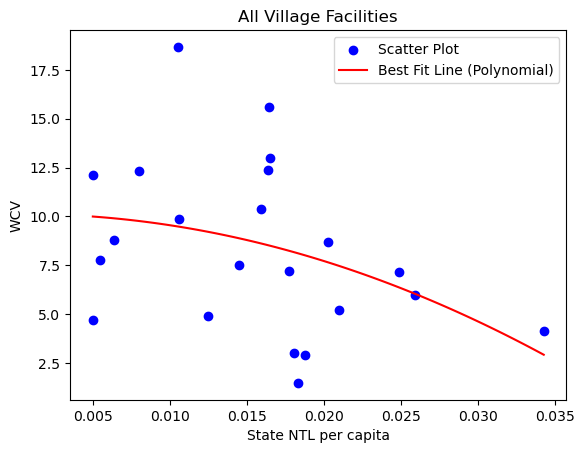

In [15]:
# Create a scatterplot
plt.scatter(wcvc['state_ntl_pc'], wcvc['WCV'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("State NTL per capita")
plt.ylabel("WCV")
plt.title("All Village Facilities")
# plt.title("All Villages")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcvc['state_ntl_pc'], wcvc['WCV'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc']), max(wcvc['state_ntl_pc']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

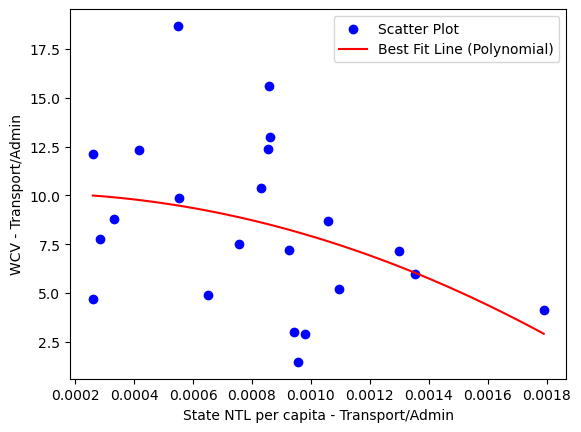

In [16]:
# Create a scatterplot
plt.scatter(wcvc['state_ntl_pc_adm'], wcvc['WCV_adm'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("State NTL per capita - Transport/Admin")
plt.ylabel("WCV - Transport/Admin")
# plt.title("All Villages")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcvc['state_ntl_pc_adm'], wcvc['WCV_adm'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_adm']), max(wcvc['state_ntl_pc_adm']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

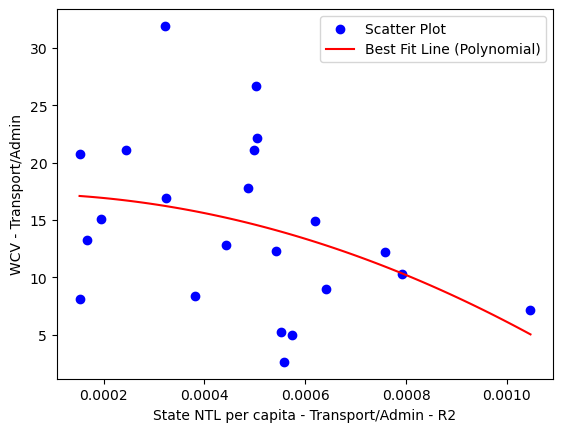

In [17]:
# Create a scatterplot
plt.scatter(wcvc['state_ntl_pc_adm_R'], wcvc['WCV_adm_R'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("State NTL per capita - Transport/Admin - R2")
plt.ylabel("WCV - Transport/Admin")
# plt.title("All Villages")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcvc['state_ntl_pc_adm_R'], wcvc['WCV_adm_R'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_adm_R']), max(wcvc['state_ntl_pc_adm_R']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot
plt.show()





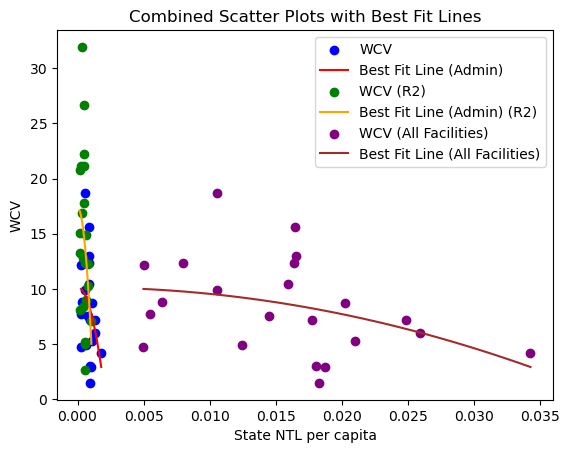

In [18]:
# Create a scatterplot for the first set of data
plt.scatter(wcvc['state_ntl_pc_adm'], wcvc['WCV_adm'], label='WCV', color='blue', marker='o')

# Fit a polynomial best fit line for the first set of data
coefficients = np.polyfit(wcvc['state_ntl_pc_adm'], wcvc['WCV_adm'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_adm']), max(wcvc['state_ntl_pc_adm']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the first set of data
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Admin)')

# Create a scatterplot for the second set of data
plt.scatter(wcvc['state_ntl_pc_adm_R'], wcvc['WCV_adm_R'], label='WCV (R2)', color='green', marker='o')

# Fit a polynomial best fit line for the second set of data
coefficients = np.polyfit(wcvc['state_ntl_pc_adm_R'], wcvc['WCV_adm_R'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_adm_R']), max(wcvc['state_ntl_pc_adm_R']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the second set of data
plt.plot(x_range, y_fit, color='orange', label='Best Fit Line (Admin) (R2)')

# Create a scatterplot for the third set of data
plt.scatter(wcvc['state_ntl_pc'], wcvc['WCV'], label='WCV (All Facilities)', color='purple', marker='o')

# Fit a polynomial best fit line for the third set of data
coefficients = np.polyfit(wcvc['state_ntl_pc'], wcvc['WCV'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc']), max(wcvc['state_ntl_pc']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the third set of data
plt.plot(x_range, y_fit, color='brown', label='Best Fit Line (All Facilities)')

# Add labels, title, and legend
plt.xlabel("State NTL per capita")
plt.ylabel("WCV")
plt.title("Combined Scatter Plots with Best Fit Lines")
plt.legend()

# Display the plot
plt.show()


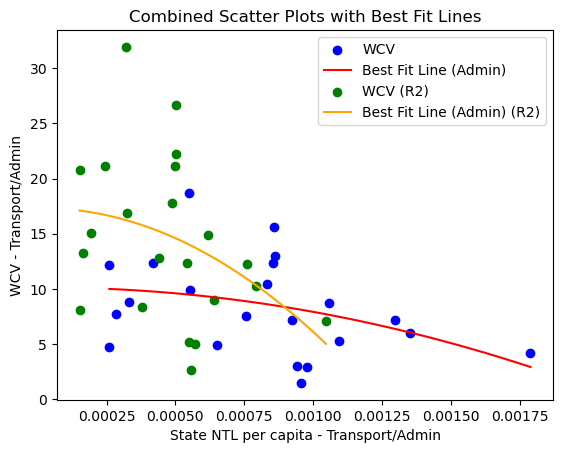

In [19]:
# Assuming you have two DataFrames wcvc and wcvc_R

# Create a scatterplot for the first set of data
plt.scatter(wcvc['state_ntl_pc_adm'], wcvc['WCV_adm'], label='WCV', color='blue', marker='o')

# Fit a polynomial best fit line for the first set of data
coefficients = np.polyfit(wcvc['state_ntl_pc_adm'], wcvc['WCV_adm'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_adm']), max(wcvc['state_ntl_pc_adm']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the first set of data
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Admin)')

# Create a scatterplot for the second set of data
plt.scatter(wcvc['state_ntl_pc_adm_R'], wcvc['WCV_adm_R'], label='WCV (R2)', color='green', marker='o')

# Fit a polynomial best fit line for the second set of data
coefficients = np.polyfit(wcvc['state_ntl_pc_adm_R'], wcvc['WCV_adm_R'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_adm_R']), max(wcvc['state_ntl_pc_adm_R']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the second set of data
plt.plot(x_range, y_fit, color='orange', label='Best Fit Line (Admin) (R2)')

# Add labels, title, and legend
plt.xlabel("State NTL per capita - Transport/Admin")
plt.ylabel("WCV - Transport/Admin")
plt.title("Combined Scatter Plots with Best Fit Lines")
plt.legend()

# Display the plot
plt.show()


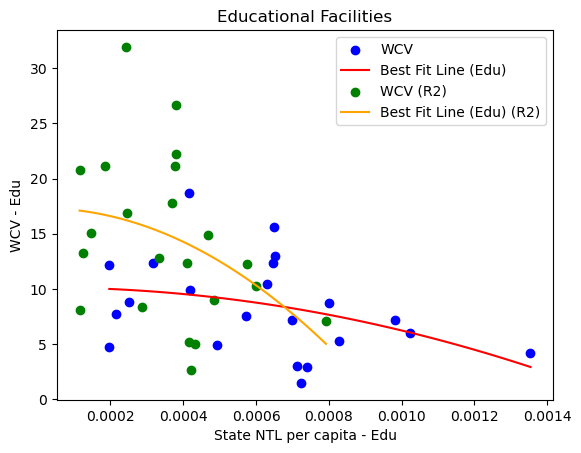

In [20]:
# Assuming you have two DataFrames wcvc and wcvc_R

# Create a scatterplot for the first set of data
plt.scatter(wcvc['state_ntl_pc_edu'], wcvc['WCV_edu'], label='WCV', color='blue', marker='o')

# Fit a polynomial best fit line for the first set of data
coefficients = np.polyfit(wcvc['state_ntl_pc_edu'], wcvc['WCV_edu'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_edu']), max(wcvc['state_ntl_pc_edu']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the first set of data
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Edu)')

# Create a scatterplot for the second set of data
plt.scatter(wcvc['state_ntl_pc_edu_R'], wcvc['WCV_edu_R'], label='WCV (R2)', color='green', marker='o')

# Fit a polynomial best fit line for the second set of data
coefficients = np.polyfit(wcvc['state_ntl_pc_edu_R'], wcvc['WCV_edu_R'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_edu_R']), max(wcvc['state_ntl_pc_edu_R']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the second set of data
plt.plot(x_range, y_fit, color='orange', label='Best Fit Line (Edu) (R2)')

# Add labels, title, and legend
plt.xlabel("State NTL per capita - Edu")
plt.ylabel("WCV - Edu")
plt.title("Educational Facilities")
plt.legend()

# Display the plot
plt.show()


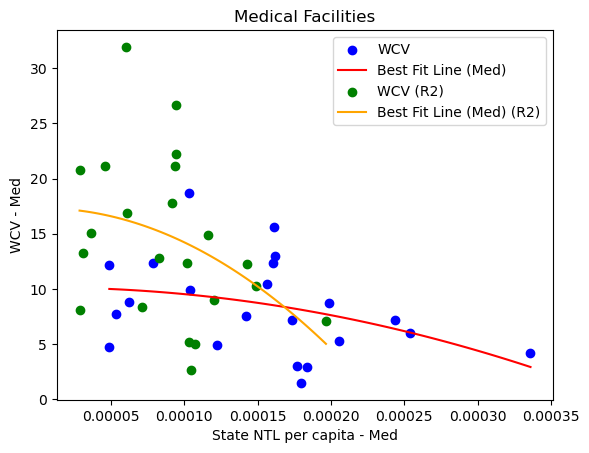

In [21]:
# Assuming you have two DataFrames wcvc and wcvc_R

# Create a scatterplot for the first set of data
plt.scatter(wcvc['state_ntl_pc_med'], wcvc['WCV_med'], label='WCV', color='blue', marker='o')

# Fit a polynomial best fit line for the first set of data
coefficients = np.polyfit(wcvc['state_ntl_pc_med'], wcvc['WCV_med'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_med']), max(wcvc['state_ntl_pc_med']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the first set of data
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Med)')

# Create a scatterplot for the second set of data
plt.scatter(wcvc['state_ntl_pc_med_R'], wcvc['WCV_med_R'], label='WCV (R2)', color='green', marker='o')

# Fit a polynomial best fit line for the second set of data
coefficients = np.polyfit(wcvc['state_ntl_pc_med_R'], wcvc['WCV_med_R'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_med_R']), max(wcvc['state_ntl_pc_med_R']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the second set of data
plt.plot(x_range, y_fit, color='orange', label='Best Fit Line (Med) (R2)')

# Add labels, title, and legend
plt.xlabel("State NTL per capita - Med")
plt.ylabel("WCV - Med")
plt.title("Medical Facilities")
plt.legend()

# Display the plot
plt.show()


## District Calculations

In [22]:
mer

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,total_cultivable_area_in_hac,total_hhd_having_bpl_cards,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,no_of_children_not_attending_school,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_adm_R,ntl_edu_R,ntl_med_R,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,ntl_pc_adm_R,ntl_pc_edu_R,ntl_pc_med_R
0,0.00000,764.45312,1127.37598,1373.12830,1094.64954,672.69849,732.88373,948.52814,272.50998,898.65466,856.98962,541.01386,843.89867,856.98962,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,273036.00000,COLLINPUR,Colinpur (RV),744102.00000,543.00000,NaN,NaN,395.00000,218.00000,177.00000,101.00000,45.00000,56.00000,56.69000,14.00000,1,0,0,0,1,1,17.00000,4.00000,0.00000,1,1,21.00000,21.00000,12.00000,21.00000,0.00000,0.00000,0.00000,0.00000,17.00000,20.00000,8.00000,27.00000,27.00000,Port Blair,8.25228,0.44449,5,1,2,0,2,1,2.13645,44.05151,33.33400,8.27021,25.77013,19.50039,4.83807,0.11152,0.08439,0.02094,0.06524,0.04937,0.01225
1,0.00000,678.44830,1017.64752,1103.71814,854.86725,955.70264,720.26904,924.17786,335.05087,36.83082,727.82294,464.54468,710.82546,727.82294,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5924.00000,Little Andaman,6494.00000,LITTLE ANDAMAN,234494.00000,NETAJINAGAR,Netaji Nagar (RV),744207.00000,543.00000,NaN,NaN,4252.00000,2339.00000,1913.00000,1127.00000,169.00000,958.00000,91.00000,50.00000,1,0,1,1,1,1,72.00000,12.00000,0.00000,1,1,129.00000,121.00000,70.00000,121.00000,186.00000,0.00000,0.00000,3.00000,120.00000,123.00000,130.00000,191.00000,191.00000,Little Andaman,NaN,0.72709,8,6,4,0,2,5,0.16717,37.10509,28.07761,6.96609,21.70648,16.42540,4.07516,0.00873,0.00660,0.00164,0.00511,0.00386,0.00096
2,0.00000,470.84308,645.05847,804.06085,561.21460,486.78476,370.05164,625.64709,82.43609,438.36816,531.12653,347.44379,487.54864,486.78476,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5919.00000,Diglipur,5919.00000,645213.00000,Radha Nagar (RV),6492.00000,DIGLIPUR,35.00000,ANDAMAN AND NICOBAR ISLANDS,632.00000,NORTH AND MIDDLE ANDAMAN,5919.00000,Diglipur,6492.00000,DIGLIP

In [23]:
## Use mer from MA Test 2
mer_dist = mer.groupby(['District','District_code','State']).agg({'avg_ntl': 'sum', 'total_population': 'sum'}).reset_index()
mer_dist_adm = mer.groupby(['District','District_code','State']).agg({'ntl_adm': 'sum', 'total_population': 'sum'}).reset_index()
mer_dist_edu = mer.groupby(['District','District_code','State']).agg({'ntl_edu': 'sum', 'total_population': 'sum'}).reset_index()
mer_dist_med = mer.groupby(['District','District_code','State']).agg({'ntl_med': 'sum', 'total_population': 'sum'}).reset_index()

mer_dist['avg_ntl'] = mer_dist['avg_ntl'].astype(float)
mer_dist_adm['ntl_adm'] = mer_dist_adm['ntl_adm'].astype(float)
mer_dist_edu['ntl_edu'] = mer_dist_edu['ntl_edu'].astype(float)
mer_dist_med['ntl_med'] = mer_dist_med['ntl_med'].astype(float)

#Rename columns
mer_dist = mer_dist.rename(columns={'avg_ntl': 'dist_ntl', 'total_population': 'dist_population'})
mer_dist_adm = mer_dist_adm.rename(columns={'ntl_adm': 'dist_ntl_adm', 'total_population': 'dist_population'})
mer_dist_edu = mer_dist_edu.rename(columns={'ntl_edu': 'dist_ntl_edu', 'total_population': 'dist_population'})
mer_dist_med = mer_dist_med.rename(columns={'ntl_med': 'dist_ntl_med', 'total_population': 'dist_population'})


# NTL per capita
mer_dist['dist_ntl_pc'] = mer_dist['dist_ntl']/mer_dist['dist_population']
mer_dist_adm['dist_ntl_pc_adm'] = mer_dist_adm['dist_ntl_adm']/mer_dist_adm['dist_population']
mer_dist_edu['dist_ntl_pc_edu'] = mer_dist_edu['dist_ntl_edu']/mer_dist_edu['dist_population']
mer_dist_med['dist_ntl_pc_med'] = mer_dist_med['dist_ntl_med']/mer_dist_med['dist_population']

# mer_dist["dist_ntl_pc"]= mer_dist['dist_ntl_pc'] * 1000
# mer_dist_adm['dist_ntl_pc_adm'] = mer_dist_adm['dist_ntl_pc_adm'] * 1000
# mer_dist_edu['dist_ntl_pc_edu'] = mer_dist_edu['dist_ntl_pc_edu'] * 1000
# mer_dist_med['dist_ntl_pc_med'] = mer_dist_med['dist_ntl_pc_med'] * 1000


mer_dist_adm = mer_dist_adm.drop(columns=['dist_population'])
mer_dist_edu = mer_dist_edu.drop(columns=['dist_population'])
mer_dist_med = mer_dist_med.drop(columns=['dist_population'])


mer_dist

,District,District_code,State,dist_ntl,dist_population,dist_ntl_pc
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,27768.72298,5979790.00000,0.00464
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,35600.34826,8740691.00000,0.00407
2,ADILABAD,532.00000,TELANGANA,14509.40529,557344.00000,0.02603
3,AGAR MALWA,0.00000,MADHYA PRADESH,7963.81906,504286.00000,0.01579
4,AGRA a,146.00000,UTTAR PRADESH,24309.54446,2669545.00000,0.00911
...,...,...,...,...,...,...
591,demoz,0.00000,ANDHRA PRADESH,478.78793,60945.00000,0.00786
592,rewa a,0.00000,UTTAR PRADESH,24145.74876,3116857.00000,0.00775
593,test dist,0.00000,ANDHRA PRADESH,59767.31391,2217985.00000,0.02695
594,viewnew,0.00000,ANDHRA PRADESH,73165.98410,3346483.00000,0.02186


In [24]:
total_population_sum = mer_dist['dist_population'].sum()

print(f"Total State Population Sum: {total_population_sum}")

Total State Population Sum: 951895962.0


In [25]:
mer_all_dist = pd.merge(mer, mer_dist, on=['District','District_code','State'], how='outer')
mer_all_dist = pd.merge(mer_all_dist, mer_dist_adm, on=['District','District_code','State'], how='outer')
mer_all_dist = pd.merge(mer_all_dist, mer_dist_edu, on=['District','District_code','State'], how='outer')
mer_all_dist = pd.merge(mer_all_dist, mer_dist_med, on=['District','District_code','State'], how='outer')
mer_all_dist['pop_share'] = mer_all_dist['total_population']/mer_all_dist['dist_population']
mer_all_dist

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,total_cultivable_area_in_hac,total_hhd_having_bpl_cards,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,no_of_children_not_attending_school,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_adm_R,ntl_edu_R,ntl_med_R,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,ntl_pc_adm_R,ntl_pc_edu_R,ntl_pc_med_R,dist_ntl,dist_population,dist_ntl_pc,dist_ntl_adm,dist_ntl_pc_adm,dist_ntl_edu,dist_ntl_pc_edu,dist_ntl_med,dist_ntl_pc_med,pop_share
0,0.00000,764.45312,1127.37598,1373.12830,1094.64954,672.69849,732.88373,948.52814,272.50998,898.65466,856.98962,541.01386,843.89867,856.98962,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,273036.00000,COLLINPUR,Colinpur (RV),744102.00000,543.00000,NaN,NaN,395.00000,218.00000,177.00000,101.00000,45.00000,56.00000,56.69000,14.00000,1,0,0,0,1,1,17.00000,4.00000,0.00000,1,1,21.00000,21.00000,12.00000,21.00000,0.00000,0.00000,0.00000,0.00000,17.00000,20.00000,8.00000,27.00000,27.00000,Port Blair,8.25228,0.44449,5,1,2,0,2,1,2.13645,44.05151,33.33400,8.27021,25.77013,19.50039,4.83807,0.11152,0.08439,0.02094,0.06524,0.04937,0.01225,2472.77070,98192.00000,0.02518,129.07863,0.00131,97.67444,0.00099,24.23315,0.00025,0.00402
1,0.00000,678.44830,1017.64752,1103.71814,854.86725,955.70264,720.26904,924.17786,335.05087,36.83082,727.82294,464.54468,710.82546,727.82294,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5924.00000,Little Andaman,6494.00000,LITTLE ANDAMAN,234494.00000,NETAJINAGAR,Netaji Nagar (RV),744207.00000,543.00000,NaN,NaN,4252.00000,2339.00000,1913.00000,1127.00000,169.00000,958.00000,91.00000,50.00000,1,0,1,1,1,1,72.00000,12.00000,0.00000,1,1,129.00000,121.00000,70.00000,121.00000,186.00000,0.00000,0.00000,3.00000,120.00000,123.00000,130.00000,191.00000,191.00000,Little Andaman,NaN,0.72709,8,6,4,0,2,5,0.16717,37.10509,28.07761,6.96609,21.70648,16.42540,4.07516,0.00873,0.00660,0.00164,0.00511,0.00386,0.00096,2472.77070,98192.00000,0.02518,129.07863,0.00131,97.67444,0.00099,24.23315,0.00025,0.04330
2,0.00000,113.40800,173.27440,206.77205,152.22765,155.46899,123.53412,157.89322,12.40843,91.49686,138.24115,83.13893,127.98762,

In [26]:

# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['dist_ntl_pc'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) / bar_y
    return wcv

def calculate_wcv_adm(group):
    bar_y = group['dist_ntl_pc_adm'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_adm'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) / bar_y
    return wcv

def calculate_wcv_edu(group):
    bar_y = group['dist_ntl_pc_edu'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_edu'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) / bar_y
    return wcv

def calculate_wcv_med(group):
    bar_y = group['dist_ntl_pc_med'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_med'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) / bar_y
    return wcv



# Calculate WCV for each state using groupby and apply
wcv = mer_all_dist.groupby(['District','District_code','State','dist_ntl_pc']).apply(calculate_wcv)
wcv_adm = mer_all_dist.groupby(['District','District_code','State']).apply(calculate_wcv_adm)
wcv_edu = mer_all_dist.groupby(['District','District_code','State']).apply(calculate_wcv_edu)
wcv_med = mer_all_dist.groupby(['District','District_code','State']).apply(calculate_wcv_med)

# Reset the index and rename the result column
wcv = wcv.reset_index(name='WCV')
wcv_adm = wcv_adm.reset_index(name='WCV_adm')
wcv_edu = wcv_edu.reset_index(name='WCV_edu')
wcv_med = wcv_med.reset_index(name='WCV_med')

wcv

,District,District_code,State,dist_ntl_pc,WCV
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,0.00464,7.07816
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,0.00407,2.84069
2,ADILABAD,532.00000,TELANGANA,0.02603,2.15725
3,AGAR MALWA,0.00000,MADHYA PRADESH,0.01579,0.60916
4,AGRA a,146.00000,UTTAR PRADESH,0.00911,3.29859
...,...,...,...,...,...
591,demoz,0.00000,ANDHRA PRADESH,0.00786,1.12584
592,rewa a,0.00000,UTTAR PRADESH,0.00775,0.79669
593,test dist,0.00000,ANDHRA PRADESH,0.02695,2.17210
594,viewnew,0.00000,ANDHRA PRADESH,0.02186,1.06210


In [27]:
wcvc = pd.merge(wcv, mer_dist, on=['District','District_code','State','dist_ntl_pc'], how='left')
wcvc = pd.merge(wcvc, mer_dist_adm, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, wcv_adm, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, mer_dist_edu, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, wcv_edu, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, mer_dist_med, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, wcv_med, on=['District','District_code','State'], how='left')
wcvc

,District,District_code,State,dist_ntl_pc,WCV,dist_ntl,dist_population,dist_ntl_adm,dist_ntl_pc_adm,WCV_adm,dist_ntl_edu,dist_ntl_pc_edu,WCV_edu,dist_ntl_med,dist_ntl_pc_med,WCV_med
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,0.00464,7.07816,27768.72298,5979790.00000,1449.52734,0.00024,7.07816,1096.86456,0.00018,7.07816,272.13349,0.00005,7.07816
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,0.00407,2.84069,35600.34826,8740691.00000,1858.33818,0.00021,2.84069,1406.21376,0.00016,2.84069,348.88341,0.00004,2.84069
2,ADILABAD,532.00000,TELANGANA,0.02603,2.15725,14509.40529,557344.00000,757.39096,0.00136,2.15725,573.12151,0.00103,2.15725,142.19217,0.00026,2.15725
3,AGAR MALWA,0.00000,MADHYA PRADESH,0.01579,0.60916,7963.81906,504286.00000,415.71135,0.00082,0.60916,314.57085,0.00062,0.60916,78.04543,0.00015,0.60916
4,AGRA a,146.00000,UTTAR PRADESH,0.00911,3.29859,24309.54446,2669545.00000,1268.95822,0.00048,3.29859,960.22701,0.00036,3.29859,238.23354,0.00009,3.29859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,demoz,0.00000,ANDHRA PRADESH,0.00786,1.12584,478.78793,60945.00000,24.99273,0.00041,1.12584,18.91212,0.00031,1.12584,4.69212,0.00008,1.12584
592,rewa a,0.00000,UTTAR PRADESH,0.00775,0.79669,24145.74876,3116857.00000,1260.40809,0.00040,0.79669,953.75708,0.00031,0.79669,236.62834,0.00008,0.79669
593,test dist,0.00000,ANDHRA PRADESH,0.02695,2.17210,59767.31391,2217985.00000,3119.85379,0.00141,2.17210,2360.80890,0.00106,2.17210,585.71968,0.00026,2.17210
594,viewnew,0.00000,ANDHRA PRADESH,0.02186,1.06210,73165.98410,3346483.00000,3819.26437,0.00114,1.06210,2890.05637,0.00086,1.06210,717.02664,0.00021,1.06210


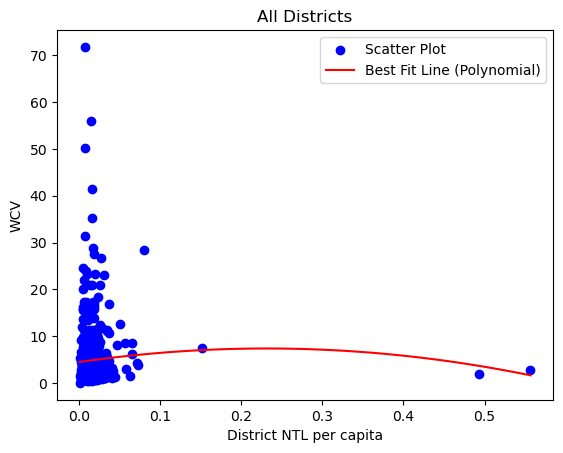

In [28]:
# Create a scatterplot
plt.scatter(wcv['dist_ntl_pc'], wcv['WCV'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("WCV")
plt.title("All Districts")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcv['dist_ntl_pc'], wcv['WCV'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcv['dist_ntl_pc']), max(wcv['dist_ntl_pc']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

#### Dealing with Outliers

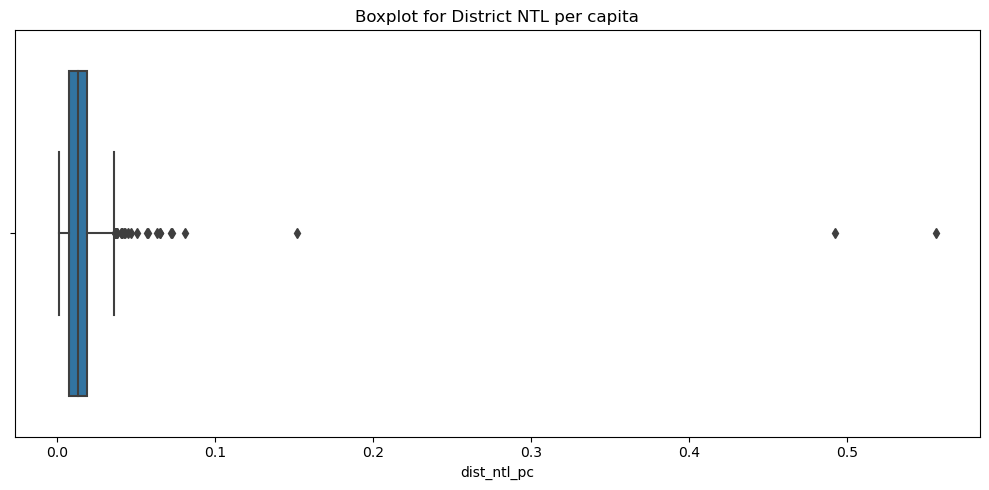

The upper whisker value is: 0.0362


In [29]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=wcvc, x='dist_ntl_pc', orient='h')
plt.title('Boxplot for District NTL per capita')

# Calculate whisker values
q1 = wcvc['dist_ntl_pc'].quantile(0.25)
q3 = wcvc['dist_ntl_pc'].quantile(0.75)
iqr = q3 - q1
upper_whisker_ntl = q3 + 1.5 * iqr
lower_whisker_ntl = q1 - 1.5 * iqr

# Add whisker values to the plot
# plt.text(1, upper_whisker, f'Upper Whisker: {upper_whisker_ntl:.4f}', ha='left', va='bottom', color='red')
# plt.text(1, lower_whisker, f'Lower Whisker: {lower_whisker_ntl:.4f}', ha='right', va='top', color='red')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

print(f"The upper whisker value is: {upper_whisker_ntl:.4f}")

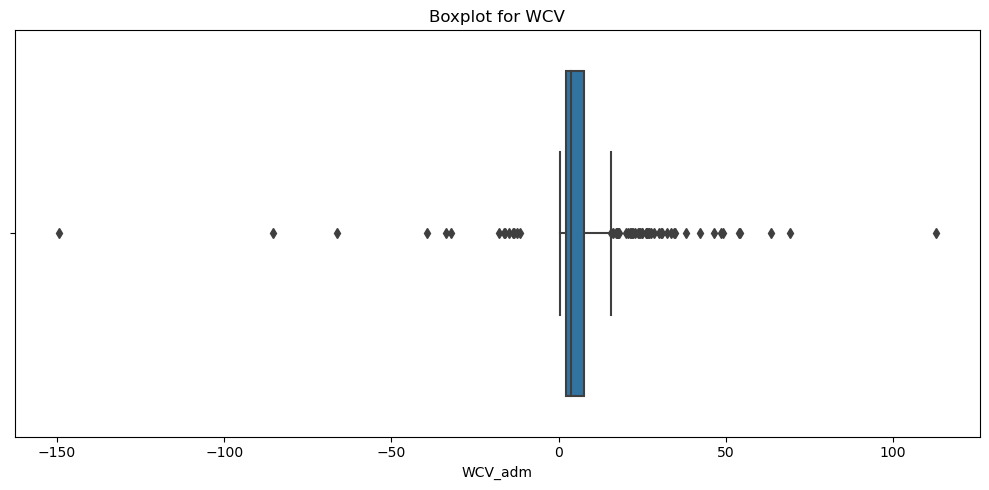

The upper whisker value is: 10.8291
The upper whisker value is: -4.0793


In [48]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=wcvc, x='WCV_adm', orient='h')
plt.title('Boxplot for WCV')

# Calculate whisker values
q1 = wcvc['WCV'].quantile(0.25)
q3 = wcvc['WCV'].quantile(0.75)
iqr = q3 - q1
upper_whisker_ntl = q3 + 1.5 * iqr
lower_whisker_ntl = q1 - 1.5 * iqr

# Add whisker values to the plot
# plt.text(1, upper_whisker, f'Upper Whisker: {upper_whisker_ntl:.4f}', ha='left', va='bottom', color='red')
# plt.text(1, lower_whisker, f'Lower Whisker: {lower_whisker_ntl:.4f}', ha='right', va='top', color='red')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

print(f"The upper whisker value is: {upper_whisker_ntl:.4f}")
print(f"The upper whisker value is: {lower_whisker_ntl:.4f}")

In [31]:
wcvo = wcvc[wcvc['dist_ntl_pc'] <= 0.0362]
wcvo = wcvo[wcvo['WCV'] <= 10.8291]
wcvo

,District,District_code,State,dist_ntl_pc,WCV,dist_ntl,dist_population,dist_ntl_adm,dist_ntl_pc_adm,WCV_adm,dist_ntl_edu,dist_ntl_pc_edu,WCV_edu,dist_ntl_med,dist_ntl_pc_med,WCV_med
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,0.00464,7.07816,27768.72298,5979790.00000,1449.52734,0.00024,7.07816,1096.86456,0.00018,7.07816,272.13349,0.00005,7.07816
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,0.00407,2.84069,35600.34826,8740691.00000,1858.33818,0.00021,2.84069,1406.21376,0.00016,2.84069,348.88341,0.00004,2.84069
2,ADILABAD,532.00000,TELANGANA,0.02603,2.15725,14509.40529,557344.00000,757.39096,0.00136,2.15725,573.12151,0.00103,2.15725,142.19217,0.00026,2.15725
3,AGAR MALWA,0.00000,MADHYA PRADESH,0.01579,0.60916,7963.81906,504286.00000,415.71135,0.00082,0.60916,314.57085,0.00062,0.60916,78.04543,0.00015,0.60916
4,AGRA a,146.00000,UTTAR PRADESH,0.00911,3.29859,24309.54446,2669545.00000,1268.95822,0.00048,3.29859,960.22701,0.00036,3.29859,238.23354,0.00009,3.29859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,demoz,0.00000,ANDHRA PRADESH,0.00786,1.12584,478.78793,60945.00000,24.99273,0.00041,1.12584,18.91212,0.00031,1.12584,4.69212,0.00008,1.12584
592,rewa a,0.00000,UTTAR PRADESH,0.00775,0.79669,24145.74876,3116857.00000,1260.40809,0.00040,0.79669,953.75708,0.00031,0.79669,236.62834,0.00008,0.79669
593,test dist,0.00000,ANDHRA PRADESH,0.02695,2.17210,59767.31391,2217985.00000,3119.85379,0.00141,2.17210,2360.80890,0.00106,2.17210,585.71968,0.00026,2.17210
594,viewnew,0.00000,ANDHRA PRADESH,0.02186,1.06210,73165.98410,3346483.00000,3819.26437,0.00114,1.06210,2890.05637,0.00086,1.06210,717.02664,0.00021,1.06210


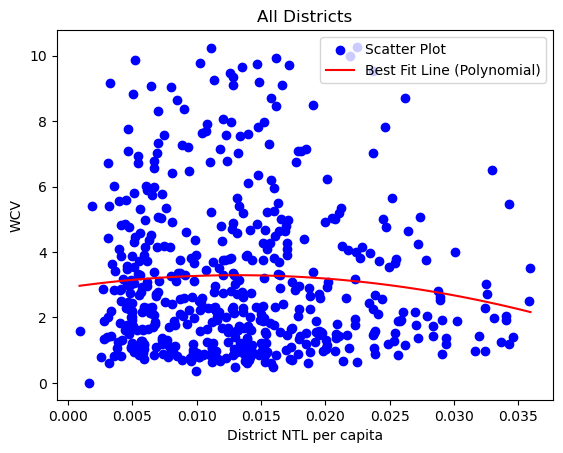

In [32]:
# Create a scatterplot
plt.scatter(wcvo['dist_ntl_pc'], wcvo['WCV'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("WCV")
plt.title("All Districts")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcvo['dist_ntl_pc'], wcvo['WCV'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvo['dist_ntl_pc']), max(wcvo['dist_ntl_pc']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot

plt.show()

#### Punjab Check with outliers

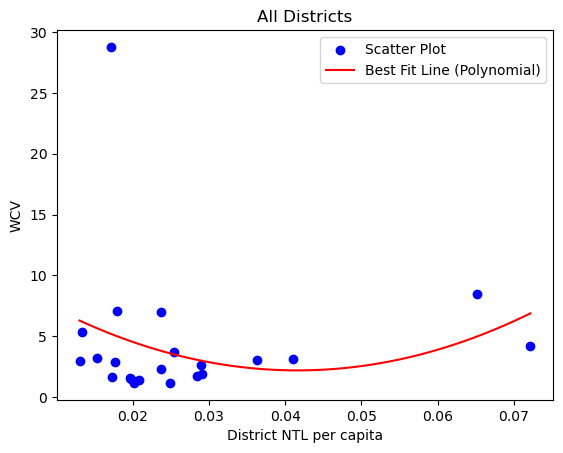

In [33]:
pb = wcvc[wcvc["State"]=="PUNJABB"]

# Create a scatterplot
plt.scatter(pb['dist_ntl_pc'], pb['WCV'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("WCV")
plt.title("All Districts")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(pb['dist_ntl_pc'], pb['WCV'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(pb['dist_ntl_pc']), max(pb['dist_ntl_pc']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot
plt.show()


## Individual States

### T1

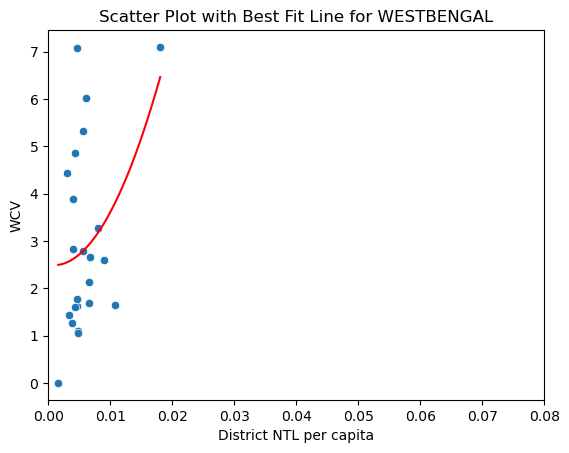

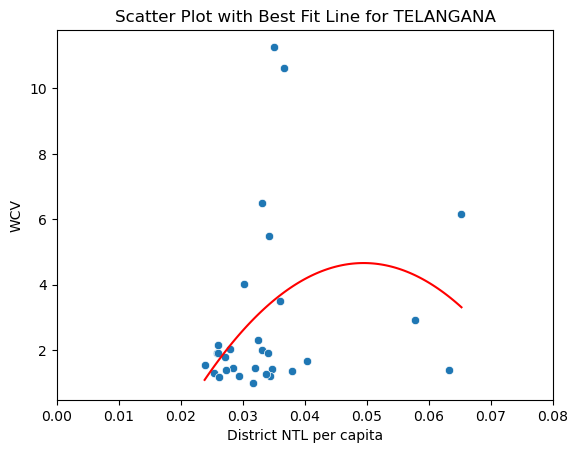

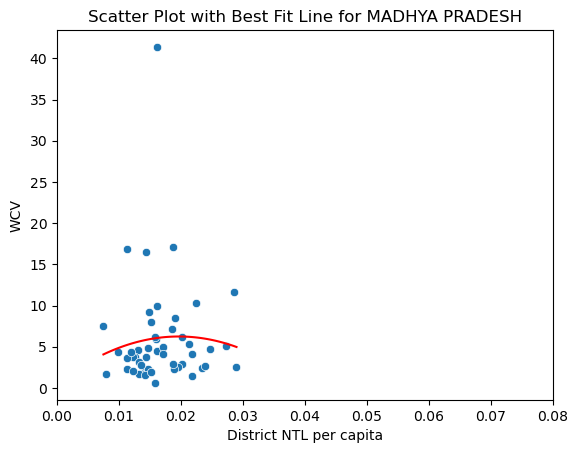

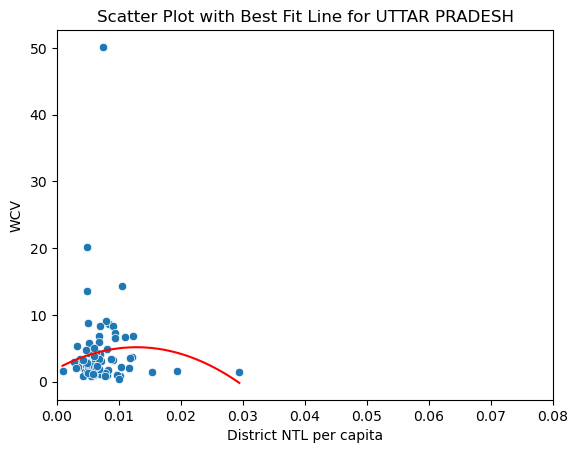

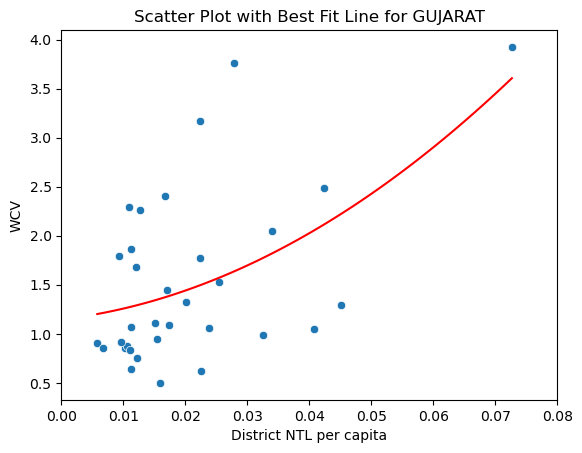

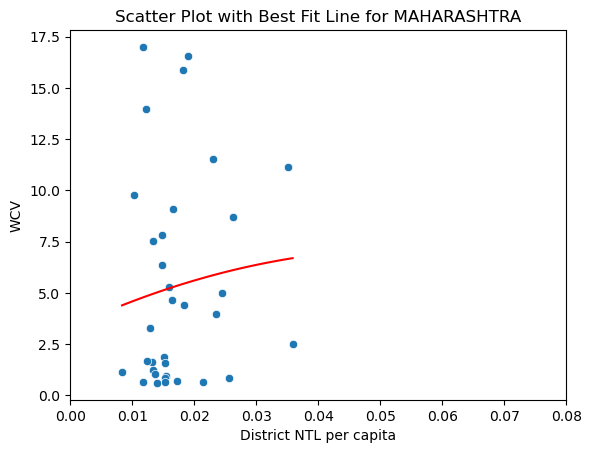

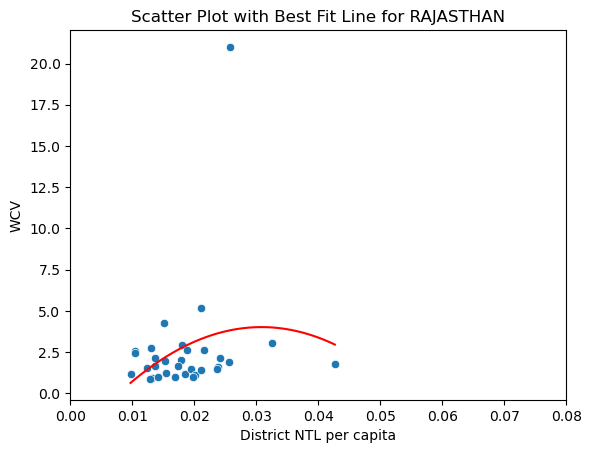

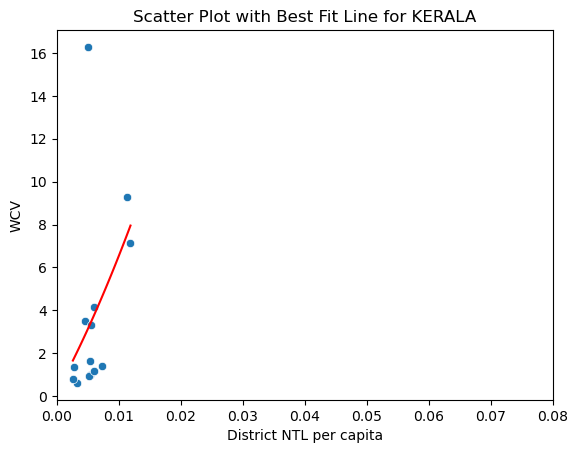

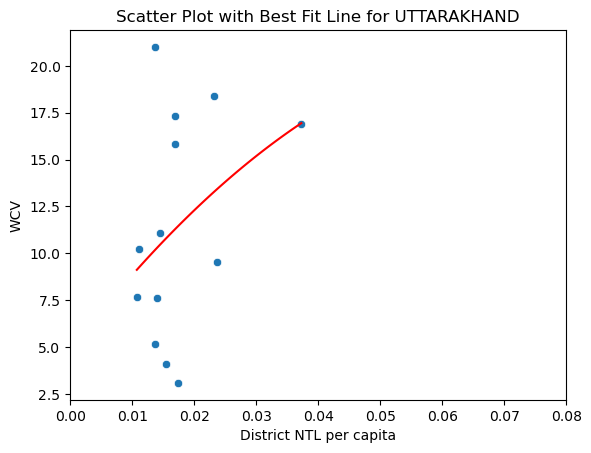

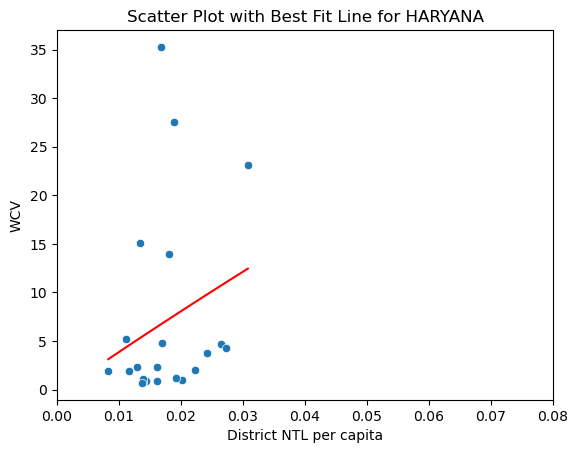

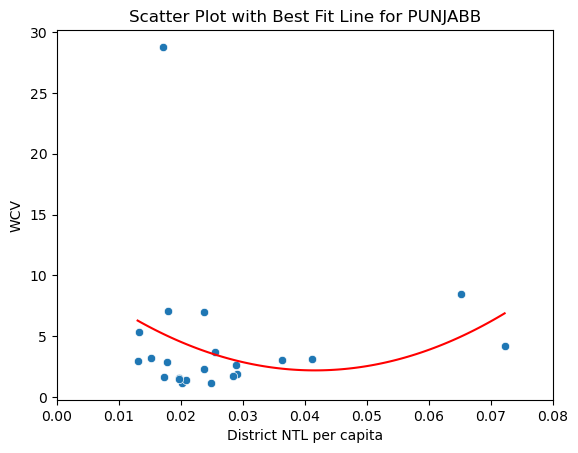

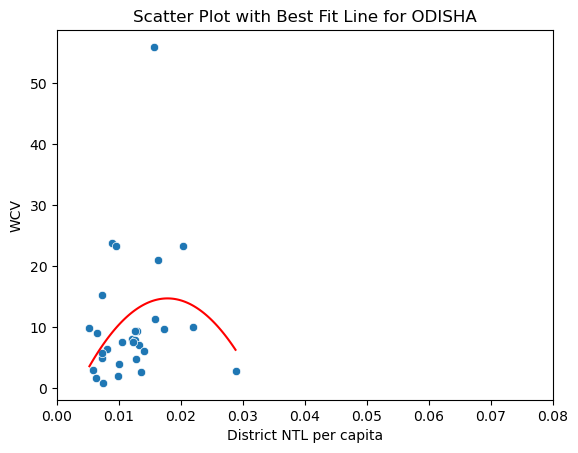

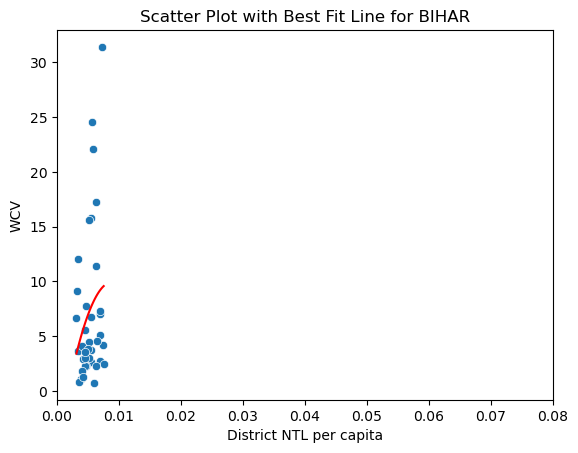

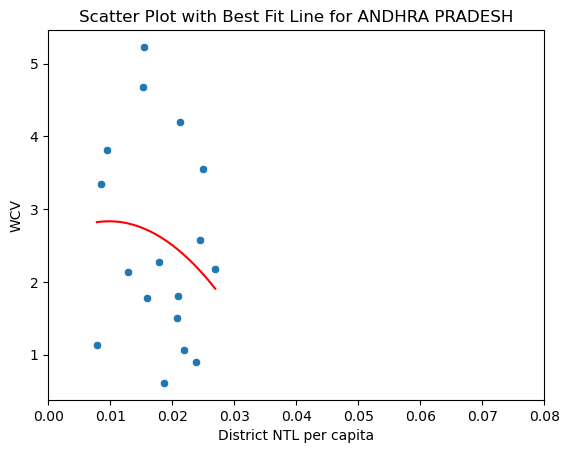

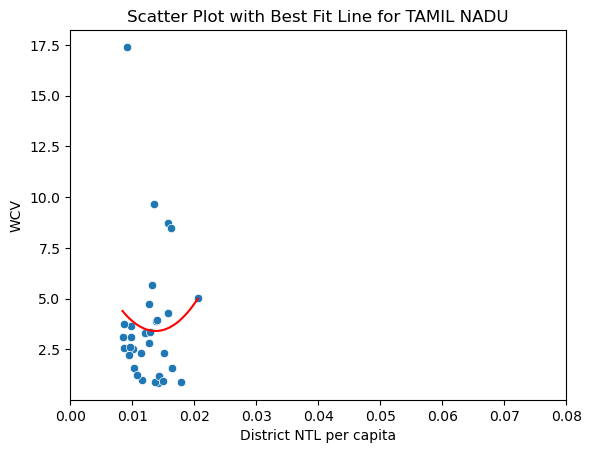

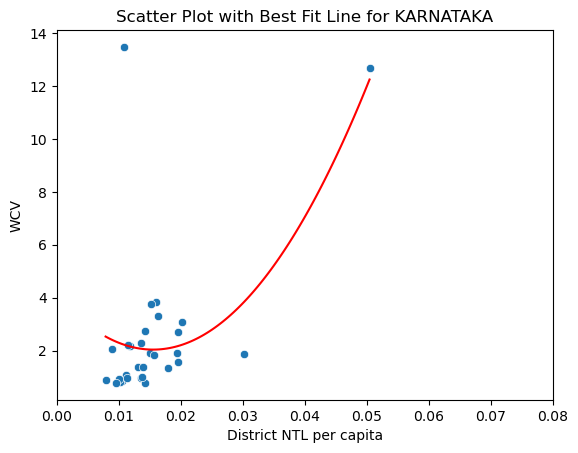

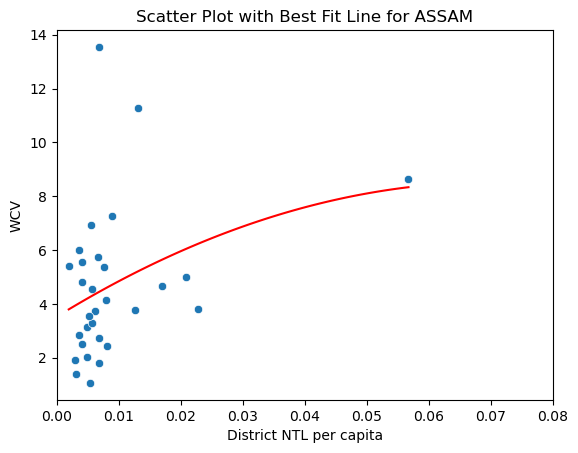

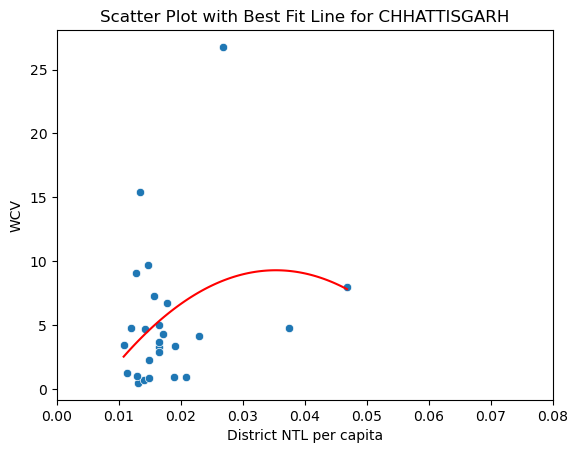

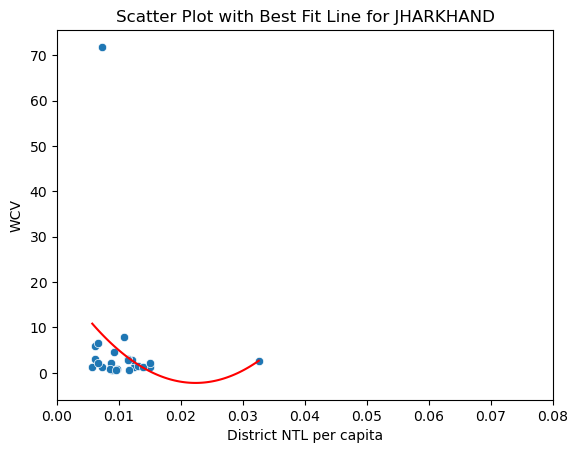

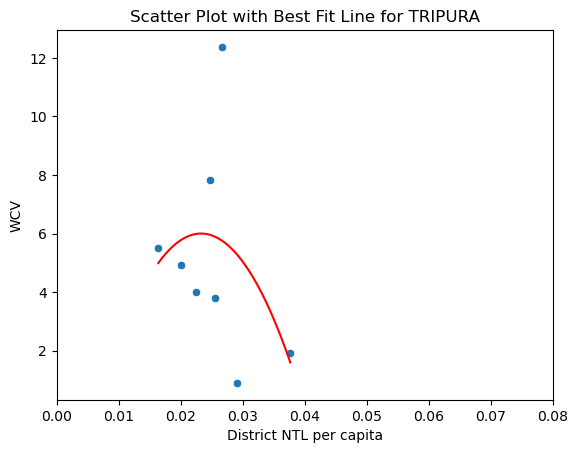

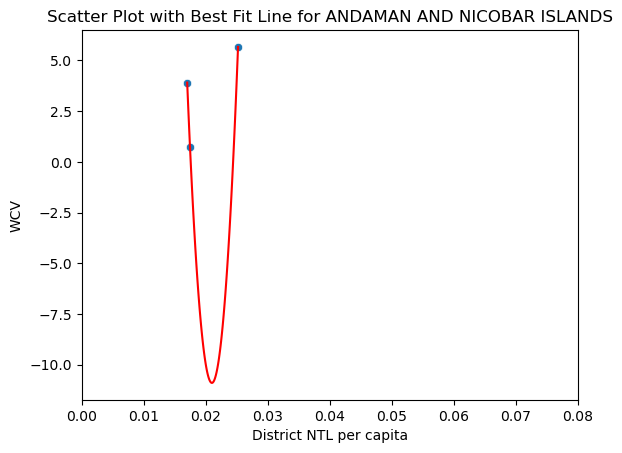

/Users/sid/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


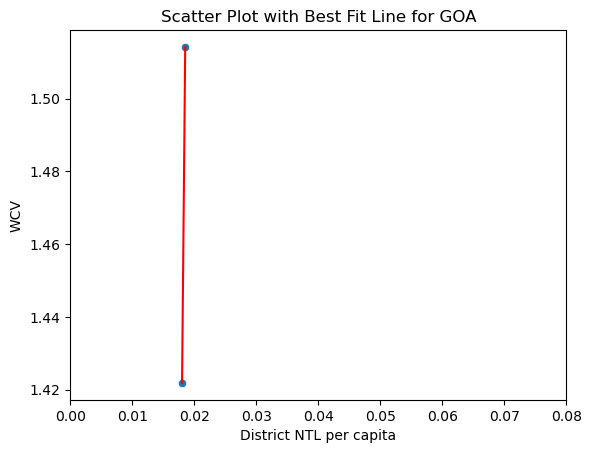

In [34]:
wcvs = wcvc[wcvc['dist_ntl_pc'] <= 0.08]
# # wcvs = wcvc[wcvc['WCV'] <= 1.2916]
wcvs

# Assuming wcvc is your DataFrame containing 'dist_ntl_pc', 'WCV', and 'State' columns

# Get unique state names
unique_states = wcvs['State'].unique()

# Create separate scatter plots with best fit line for each state
for state in unique_states:
    state_data = wcvs[wcvs['State'] == state]
    
    plt.figure()  # Create a new figure for each plot
    sns.scatterplot(x='dist_ntl_pc', y='WCV', data=state_data)
    
    # Fit a polynomial best fit line (e.g., a quadratic curve)
    coefficients = np.polyfit(state_data['dist_ntl_pc'], state_data['WCV'], 2)  # Quadratic fit
    polynomial = np.poly1d(coefficients)
    x_range = np.linspace(min(state_data['dist_ntl_pc']), max(state_data['dist_ntl_pc']), 100)
    y_fit = polynomial(x_range)
    plt.plot(x_range, y_fit, color='red')
    
    # Set x and y-axis limits
    plt.xlim(0, 0.08)
    # plt.ylim(0, 3)
    
    # Add labels, title, legend, and show plot
    plt.xlabel("District NTL per capita")
    plt.ylabel("WCV")
    plt.title(f"Scatter Plot with Best Fit Line for {state}")
    # plt.legend()
    plt.show()


### T2

In [35]:
mes = ma.copy()
mes["ntl_pc"]= mes['avg_ntl']/mes['total_population']

# Initializing with zeros or any default value
mes['ntl_adm']= 0.0 
mes["ntl_edu"]= 0.0 
mes["ntl_med"]= 0.0 
# Apply the condition to set values for 'ntl_adm' for each 'state'
mes.loc[mes['State'] == 'ANDHRA PRADESH', 'ntl_adm'] = mes.loc[mes['State'] == 'ANDHRA PRADESH', 'avg_ntl'] * 0.0292
mes.loc[mes['State'] == 'ASSAM', 'ntl_adm'] = mes.loc[mes['State'] == 'ASSAM', 'avg_ntl'] * 0.0333
mes.loc[mes['State'] == 'BIHAR', 'ntl_adm'] = mes.loc[mes['State'] == 'BIHAR', 'avg_ntl'] * 0.0237
mes.loc[mes['State'] == 'CHHATTISGARH', 'ntl_adm'] = mes.loc[mes['State'] == 'CHHATTISGARH', 'avg_ntl'] * 0.0458
mes.loc[mes['State'] == 'GUJARAT', 'ntl_adm'] = mes.loc[mes['State'] == 'GUJARAT', 'avg_ntl'] * 0.0275
mes.loc[mes['State'] == 'HARYANA', 'ntl_adm'] = mes.loc[mes['State'] == 'HARYANA', 'avg_ntl'] * 00.0549
mes.loc[mes['State'] == 'JHARKHAND', 'ntl_adm'] = mes.loc[mes['State'] == 'JHARKHAND', 'avg_ntl'] * 00.0332
mes.loc[mes['State'] == 'KARNATAKA', 'ntl_adm'] = mes.loc[mes['State'] == 'KARNATAKA', 'avg_ntl'] * 00.0265
mes.loc[mes['State'] == 'KERALA', 'ntl_adm'] = mes.loc[mes['State'] == 'KERALA', 'avg_ntl'] * -0.0057
mes.loc[mes['State'] == 'MADHYA PRADESH', 'ntl_adm'] = mes.loc[mes['State'] == 'MADHYA PRADESH', 'avg_ntl'] * 00.0698
mes.loc[mes['State'] == 'MAHARASHTRA', 'ntl_adm'] = mes.loc[mes['State'] == 'MAHARASHTRA', 'avg_ntl'] * 00.0710
mes.loc[mes['State'] == 'ODISHA', 'ntl_adm'] = mes.loc[mes['State'] == 'ODISHA', 'avg_ntl'] * 00.0460
mes.loc[mes['State'] == 'PUNJABB', 'ntl_adm'] = mes.loc[mes['State'] == 'PUNJABB', 'avg_ntl'] * 00.0354
mes.loc[mes['State'] == 'RAJASTHAN', 'ntl_adm'] = mes.loc[mes['State'] == 'RAJASTHAN', 'avg_ntl'] * 00.0364
mes.loc[mes['State'] == 'TAMIL NADU', 'ntl_adm'] = mes.loc[mes['State'] == 'TAMIL NADU', 'avg_ntl'] * 00.0506
mes.loc[mes['State'] == 'TELANGANA', 'ntl_adm'] = mes.loc[mes['State'] == 'TELANGANA', 'avg_ntl'] * 00.0120
mes.loc[mes['State'] == 'TRIPURA', 'ntl_adm'] = mes.loc[mes['State'] == 'TRIPURA', 'avg_ntl'] * 00.0502
mes.loc[mes['State'] == 'UTTAR PRADESH', 'ntl_adm'] = mes.loc[mes['State'] == 'UTTAR PRADESH', 'avg_ntl'] * 00.0484
mes.loc[mes['State'] == 'UTTARAKHAND', 'ntl_adm'] = mes.loc[mes['State'] == 'UTTARAKHAND', 'avg_ntl'] * 00.0396
mes.loc[mes['State'] == 'WESTBENGAL', 'ntl_adm'] = mes.loc[mes['State'] == 'WESTBENGAL', 'avg_ntl'] * 00.0388

# Apply the condition to set values for 'ntl_edu' for each 'state'
mes.loc[mes['State'] == 'ANDHRA PRADESH', 'ntl_edu'] = mes.loc[mes['State'] == 'ANDHRA PRADESH', 'avg_ntl'] * -0.0085
mes.loc[mes['State'] == 'ASSAM', 'ntl_edu'] = mes.loc[mes['State'] == 'ASSAM', 'avg_ntl'] * 00.0119
mes.loc[mes['State'] == 'BIHAR', 'ntl_edu'] = mes.loc[mes['State'] == 'BIHAR', 'avg_ntl'] * 00.0365
mes.loc[mes['State'] == 'CHHATTISGARH', 'ntl_edu'] = mes.loc[mes['State'] == 'CHHATTISGARH', 'avg_ntl'] * 00.0043
mes.loc[mes['State'] == 'GUJARAT', 'ntl_edu'] = mes.loc[mes['State'] == 'GUJARAT', 'avg_ntl'] * 00.0006
mes.loc[mes['State'] == 'HARYANA', 'ntl_edu'] = mes.loc[mes['State'] == 'HARYANA', 'avg_ntl'] * 0.0372
mes.loc[mes['State'] == 'JHARKHAND', 'ntl_edu'] = mes.loc[mes['State'] == 'JHARKHAND', 'avg_ntl'] * 0.0198
mes.loc[mes['State'] == 'KARNATAKA', 'ntl_edu'] = mes.loc[mes['State'] == 'KARNATAKA', 'avg_ntl'] * 0.0279
mes.loc[mes['State'] == 'KERALA', 'ntl_edu'] = mes.loc[mes['State'] == 'KERALA', 'avg_ntl'] * -0.0073
mes.loc[mes['State'] == 'MADHYA PRADESH', 'ntl_edu'] = mes.loc[mes['State'] == 'MADHYA PRADESH', 'avg_ntl'] * 0.0418
mes.loc[mes['State'] == 'MAHARASHTRA', 'ntl_edu'] = mes.loc[mes['State'] == 'MAHARASHTRA', 'avg_ntl'] * 0.0372
mes.loc[mes['State'] == 'ODISHA', 'ntl_edu'] = mes.loc[mes['State'] == 'ODISHA', 'avg_ntl'] * 0.0597
mes.loc[mes['State'] == 'PUNJABB', 'ntl_edu'] = mes.loc[mes['State'] == 'PUNJABB', 'avg_ntl'] * 0.0021
mes.loc[mes['State'] == 'RAJASTHAN', 'ntl_edu'] = mes.loc[mes['State'] == 'RAJASTHAN', 'avg_ntl'] * 0.0280
mes.loc[mes['State'] == 'TAMIL NADU', 'ntl_edu'] = mes.loc[mes['State'] == 'TAMIL NADU', 'avg_ntl'] * 0.0271
mes.loc[mes['State'] == 'TELANGANA', 'ntl_edu'] = mes.loc[mes['State'] == 'TELANGANA', 'avg_ntl'] * 0.0238
mes.loc[mes['State'] == 'TRIPURA', 'ntl_edu'] = mes.loc[mes['State'] == 'TRIPURA', 'avg_ntl'] * 00.0152
mes.loc[mes['State'] == 'UTTAR PRADESH', 'ntl_edu'] = mes.loc[mes['State'] == 'UTTAR PRADESH', 'avg_ntl'] * 00.0432
mes.loc[mes['State'] == 'UTTARAKHAND', 'ntl_edu'] = mes.loc[mes['State'] == 'UTTARAKHAND', 'avg_ntl'] * 0.0213
mes.loc[mes['State'] == 'WESTBENGAL', 'ntl_edu']= mes.loc[mes['State'] == 'WESTBENGAL', 'avg_ntl'] * 0.0092

# Apply the condition to set values for 'ntl_edu' for each 'state'
mes.loc[mes['State'] == 'ANDHRA PRADESH', 'ntl_med'] = mes.loc[mes['State'] == 'ANDHRA PRADESH', 'avg_ntl'] * -0.0200
mes.loc[mes['State'] == 'ASSAM', 'ntl_med'] = mes.loc[mes['State'] == 'ASSAM', 'avg_ntl'] * 0.0255
mes.loc[mes['State'] == 'BIHAR', 'ntl_med'] = mes.loc[mes['State'] == 'BIHAR', 'avg_ntl'] * 0.0136
mes.loc[mes['State'] == 'CHHATTISGARH', 'ntl_med'] = mes.loc[mes['State'] == 'CHHATTISGARH', 'avg_ntl'] * -0.0032
mes.loc[mes['State'] == 'GUJARAT', 'ntl_med'] = mes.loc[mes['State'] == 'GUJARAT', 'avg_ntl'] * 0.0005
mes.loc[mes['State'] == 'HARYANA', 'ntl_med'] = mes.loc[mes['State'] == 'HARYANA', 'avg_ntl'] * 0.0179
mes.loc[mes['State'] == 'JHARKHAND', 'ntl_med'] = mes.loc[mes['State'] == 'JHARKHAND', 'avg_ntl'] * 0.0347
mes.loc[mes['State'] == 'KARNATAKA', 'ntl_med'] = mes.loc[mes['State'] == 'KARNATAKA', 'avg_ntl'] * -0.0137
mes.loc[mes['State'] == 'KERALA', 'ntl_med'] = mes.loc[mes['State'] == 'KERALA', 'avg_ntl'] * 0.0088
mes.loc[mes['State'] == 'MADHYA PRADESH', 'ntl_med'] = mes.loc[mes['State'] == 'MADHYA PRADESH', 'avg_ntl'] * 0.0055
mes.loc[mes['State'] == 'MAHARASHTRA', 'ntl_med'] = mes.loc[mes['State'] == 'MAHARASHTRA', 'avg_ntl'] * 0.0054
mes.loc[mes['State'] == 'ODISHA', 'ntl_med'] = mes.loc[mes['State'] == 'ODISHA', 'avg_ntl'] * 0.0093
mes.loc[mes['State'] == 'PUNJABB', 'ntl_med'] = mes.loc[mes['State'] == 'PUNJABB', 'avg_ntl'] * -0.0357
mes.loc[mes['State'] == 'RAJASTHAN', 'ntl_med'] = mes.loc[mes['State'] == 'RAJASTHAN', 'avg_ntl'] * 0.0169
mes.loc[mes['State'] == 'TAMIL NADU', 'ntl_med'] = mes.loc[mes['State'] == 'TAMIL NADU', 'avg_ntl'] * -0.0127
mes.loc[mes['State'] == 'TELANGANA', 'ntl_med'] = mes.loc[mes['State'] == 'TELANGANA', 'avg_ntl'] * 0.0140
mes.loc[mes['State'] == 'TRIPURA', 'ntl_med'] = mes.loc[mes['State'] == 'TRIPURA', 'avg_ntl'] * -0.0157
mes.loc[mes['State'] == 'UTTAR PRADESH', 'ntl_med'] = mes.loc[mes['State'] == 'UTTAR PRADESH', 'avg_ntl'] * 0.0124
mes.loc[mes['State'] == 'UTTARAKHAND', 'ntl_med'] = mes.loc[mes['State'] == 'UTTARAKHAND', 'avg_ntl'] * 0.0391
mes.loc[mes['State'] == 'WESTBENGAL', 'ntl_med']= mes.loc[mes['State'] == 'WESTBENGAL', 'avg_ntl'] * -0.0028


mes["ntl_pc"]= mes['avg_ntl']/mes['total_population']
mes["ntl_pc_adm"]= mes['ntl_adm']/mes['total_population']
mes["ntl_pc_edu"]= mes['ntl_edu']/mes['total_population']
mes["ntl_pc_med"]= mes['ntl_med']/mes['total_population']
# mes["ntl_pc_adm_R"]= mes['ntl_adm_R']/mes['total_population']
# mes["ntl_pc_edu_R"]= mes['ntl_edu_R']/mes['total_population']
# mes["ntl_pc_med_R"]= mes['ntl_med_R']/mes['total_population']

mes

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,total_cultivable_area_in_hac,total_hhd_having_bpl_cards,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,no_of_children_not_attending_school,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_pc_adm,ntl_pc_edu,ntl_pc_med
0,0.00000,764.45312,1127.37598,1373.12830,1094.64954,672.69849,732.88373,948.52814,272.50998,898.65466,856.98962,541.01386,843.89867,856.98962,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,273036.00000,COLLINPUR,Colinpur (RV),744102.00000,543.00000,NaN,NaN,395.00000,218.00000,177.00000,101.00000,45.00000,56.00000,56.69000,14.00000,1,0,0,0,1,1,17.00000,4.00000,0.00000,1,1,21.00000,21.00000,12.00000,21.00000,0.00000,0.00000,0.00000,0.00000,17.00000,20.00000,8.00000,27.00000,27.00000,Port Blair,8.25228,0.44449,5,1,2,0,2,1,2.13645,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.00000,678.44830,1017.64752,1103.71814,854.86725,955.70264,720.26904,924.17786,335.05087,36.83082,727.82294,464.54468,710.82546,727.82294,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5924.00000,Little Andaman,6494.00000,LITTLE ANDAMAN,234494.00000,NETAJINAGAR,Netaji Nagar (RV),744207.00000,543.00000,NaN,NaN,4252.00000,2339.00000,1913.00000,1127.00000,169.00000,958.00000,91.00000,50.00000,1,0,1,1,1,1,72.00000,12.00000,0.00000,1,1,129.00000,121.00000,70.00000,121.00000,186.00000,0.00000,0.00000,3.00000,120.00000,123.00000,130.00000,191.00000,191.00000,Little Andaman,NaN,0.72709,8,6,4,0,2,5,0.16717,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,470.84308,645.05847,804.06085,561.21460,486.78476,370.05164,625.64709,82.43609,438.36816,531.12653,347.44379,487.54864,486.78476,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5919.00000,Diglipur,5919.00000,645213.00000,Radha Nagar (RV),6492.00000,DIGLIPUR,35.00000,ANDAMAN AND NICOBAR ISLANDS,632.00000,NORTH AND MIDDLE ANDAMAN,5919.00000,Diglipur,6492.00000,DIGLIPUR,234473.00000,RADHANAGAR,Radha Nagar (RV),744202.00000,543.00000,NaN,NaN,1091.00000,596.00000,495.00000,279.00000,97.00000,182.00000,83.44000,0.00000,1,0,0,1,1,1,74.00000,

In [36]:
## Use mer from MA Test 2
mer_dist = mes.groupby(['District','District_code','State']).agg({'avg_ntl': 'sum', 'total_population': 'sum'}).reset_index()
mer_dist_adm = mes.groupby(['District','District_code','State']).agg({'ntl_adm': 'sum', 'total_population': 'sum'}).reset_index()
mer_dist_edu = mes.groupby(['District','District_code','State']).agg({'ntl_edu': 'sum', 'total_population': 'sum'}).reset_index()
mer_dist_med = mes.groupby(['District','District_code','State']).agg({'ntl_med': 'sum', 'total_population': 'sum'}).reset_index()

mer_dist['avg_ntl'] = mer_dist['avg_ntl'].astype(float)
mer_dist_adm['ntl_adm'] = mer_dist_adm['ntl_adm'].astype(float)
mer_dist_edu['ntl_edu'] = mer_dist_edu['ntl_edu'].astype(float)
mer_dist_med['ntl_med'] = mer_dist_med['ntl_med'].astype(float)

#Rename columns
mer_dist = mer_dist.rename(columns={'avg_ntl': 'dist_ntl', 'total_population': 'dist_population'})
mer_dist_adm = mer_dist_adm.rename(columns={'ntl_adm': 'dist_ntl_adm', 'total_population': 'dist_population'})
mer_dist_edu = mer_dist_edu.rename(columns={'ntl_edu': 'dist_ntl_edu', 'total_population': 'dist_population'})
mer_dist_med = mer_dist_med.rename(columns={'ntl_med': 'dist_ntl_med', 'total_population': 'dist_population'})


# NTL per capita
mer_dist['dist_ntl_pc'] = mer_dist['dist_ntl']/mer_dist['dist_population']
mer_dist_adm['dist_ntl_pc_adm'] = mer_dist_adm['dist_ntl_adm']/mer_dist_adm['dist_population']
mer_dist_edu['dist_ntl_pc_edu'] = mer_dist_edu['dist_ntl_edu']/mer_dist_edu['dist_population']
mer_dist_med['dist_ntl_pc_med'] = mer_dist_med['dist_ntl_med']/mer_dist_med['dist_population']

# mer_dist["dist_ntl_pc"]= mer_dist['dist_ntl_pc'] * 1000
# mer_dist_adm['dist_ntl_pc_adm'] = mer_dist_adm['dist_ntl_pc_adm'] * 1000
# mer_dist_edu['dist_ntl_pc_edu'] = mer_dist_edu['dist_ntl_pc_edu'] * 1000
# mer_dist_med['dist_ntl_pc_med'] = mer_dist_med['dist_ntl_pc_med'] * 1000


mer_dist_adm = mer_dist_adm.drop(columns=['dist_population'])
mer_dist_edu = mer_dist_edu.drop(columns=['dist_population'])
mer_dist_med = mer_dist_med.drop(columns=['dist_population'])


mer_dist

,District,District_code,State,dist_ntl,dist_population,dist_ntl_pc
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,27768.72298,5979790.00000,0.00464
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,35600.34826,8740691.00000,0.00407
2,ADILABAD,532.00000,TELANGANA,14509.40529,557344.00000,0.02603
3,AGAR MALWA,0.00000,MADHYA PRADESH,7963.81906,504286.00000,0.01579
4,AGRA a,146.00000,UTTAR PRADESH,24309.54446,2669545.00000,0.00911
...,...,...,...,...,...,...
591,demoz,0.00000,ANDHRA PRADESH,478.78793,60945.00000,0.00786
592,rewa a,0.00000,UTTAR PRADESH,24145.74876,3116857.00000,0.00775
593,test dist,0.00000,ANDHRA PRADESH,59767.31391,2217985.00000,0.02695
594,viewnew,0.00000,ANDHRA PRADESH,73165.98410,3346483.00000,0.02186


In [37]:
mer_all_dist = pd.merge(mer, mer_dist, on=['District','District_code','State'], how='outer')
mer_all_dist = pd.merge(mer_all_dist, mer_dist_adm, on=['District','District_code','State'], how='outer')
mer_all_dist = pd.merge(mer_all_dist, mer_dist_edu, on=['District','District_code','State'], how='outer')
mer_all_dist = pd.merge(mer_all_dist, mer_dist_med, on=['District','District_code','State'], how='outer')
mer_all_dist['pop_share'] = mer_all_dist['total_population']/mer_all_dist['dist_population']
mer_all_dist

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,total_cultivable_area_in_hac,total_hhd_having_bpl_cards,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,no_of_children_not_attending_school,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_adm_R,ntl_edu_R,ntl_med_R,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,ntl_pc_adm_R,ntl_pc_edu_R,ntl_pc_med_R,dist_ntl,dist_population,dist_ntl_pc,dist_ntl_adm,dist_ntl_pc_adm,dist_ntl_edu,dist_ntl_pc_edu,dist_ntl_med,dist_ntl_pc_med,pop_share
0,0.00000,764.45312,1127.37598,1373.12830,1094.64954,672.69849,732.88373,948.52814,272.50998,898.65466,856.98962,541.01386,843.89867,856.98962,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,273036.00000,COLLINPUR,Colinpur (RV),744102.00000,543.00000,NaN,NaN,395.00000,218.00000,177.00000,101.00000,45.00000,56.00000,56.69000,14.00000,1,0,0,0,1,1,17.00000,4.00000,0.00000,1,1,21.00000,21.00000,12.00000,21.00000,0.00000,0.00000,0.00000,0.00000,17.00000,20.00000,8.00000,27.00000,27.00000,Port Blair,8.25228,0.44449,5,1,2,0,2,1,2.13645,44.05151,33.33400,8.27021,25.77013,19.50039,4.83807,0.11152,0.08439,0.02094,0.06524,0.04937,0.01225,2472.77070,98192.00000,0.02518,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00402
1,0.00000,678.44830,1017.64752,1103.71814,854.86725,955.70264,720.26904,924.17786,335.05087,36.83082,727.82294,464.54468,710.82546,727.82294,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5924.00000,Little Andaman,6494.00000,LITTLE ANDAMAN,234494.00000,NETAJINAGAR,Netaji Nagar (RV),744207.00000,543.00000,NaN,NaN,4252.00000,2339.00000,1913.00000,1127.00000,169.00000,958.00000,91.00000,50.00000,1,0,1,1,1,1,72.00000,12.00000,0.00000,1,1,129.00000,121.00000,70.00000,121.00000,186.00000,0.00000,0.00000,3.00000,120.00000,123.00000,130.00000,191.00000,191.00000,Little Andaman,NaN,0.72709,8,6,4,0,2,5,0.16717,37.10509,28.07761,6.96609,21.70648,16.42540,4.07516,0.00873,0.00660,0.00164,0.00511,0.00386,0.00096,2472.77070,98192.00000,0.02518,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.04330
2,0.00000,113.40800,173.27440,206.77205,152.22765,155.46899,123.53412,157.89322,12.40843,91.49686,138.24115,83.13893,127.98762,138.2411

In [38]:

# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['dist_ntl_pc'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) / bar_y
    return wcv

def calculate_wcv_adm(group):
    bar_y = group['dist_ntl_pc_adm'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_adm'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) / bar_y
    return wcv

def calculate_wcv_edu(group):
    bar_y = group['dist_ntl_pc_edu'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_edu'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) / bar_y
    return wcv

def calculate_wcv_med(group):
    bar_y = group['dist_ntl_pc_med'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_med'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) / bar_y
    return wcv



# Calculate WCV for each state using groupby and apply
wcv = mer_all_dist.groupby(['District','District_code','State','dist_ntl_pc']).apply(calculate_wcv)
wcv_adm = mer_all_dist.groupby(['District','District_code','State']).apply(calculate_wcv_adm)
wcv_edu = mer_all_dist.groupby(['District','District_code','State']).apply(calculate_wcv_edu)
wcv_med = mer_all_dist.groupby(['District','District_code','State']).apply(calculate_wcv_med)

# Reset the index and rename the result column
wcv = wcv.reset_index(name='WCV')
wcv_adm = wcv_adm.reset_index(name='WCV_adm')
wcv_edu = wcv_edu.reset_index(name='WCV_edu')
wcv_med = wcv_med.reset_index(name='WCV_med')

wcv

/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_10823/1901900753.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  wcv = ((numerator)**0.5) / bar_y
/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_10823/1901900753.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  wcv = ((numerator)**0.5) / bar_y
/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_10823/1901900753.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  wcv = ((numerator)**0.5) / bar_y


,District,District_code,State,dist_ntl_pc,WCV
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,0.00464,7.07816
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,0.00407,2.84069
2,ADILABAD,532.00000,TELANGANA,0.02603,2.15725
3,AGAR MALWA,0.00000,MADHYA PRADESH,0.01579,0.60916
4,AGRA a,146.00000,UTTAR PRADESH,0.00911,3.29859
...,...,...,...,...,...
591,demoz,0.00000,ANDHRA PRADESH,0.00786,1.12584
592,rewa a,0.00000,UTTAR PRADESH,0.00775,0.79669
593,test dist,0.00000,ANDHRA PRADESH,0.02695,2.17210
594,viewnew,0.00000,ANDHRA PRADESH,0.02186,1.06210


In [39]:
wcvc = pd.merge(wcv, mer_dist, on=['District','District_code','State','dist_ntl_pc'], how='left')
wcvc = pd.merge(wcvc, mer_dist_adm, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, wcv_adm, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, mer_dist_edu, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, wcv_edu, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, mer_dist_med, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, wcv_med, on=['District','District_code','State'], how='left')
wcvs = wcvc[wcvc['dist_ntl_pc'] <= 0.08]
# wcvs = wcvc[wcvc['WCV'] <= 1.2916]
wcvs

,District,District_code,State,dist_ntl_pc,WCV,dist_ntl,dist_population,dist_ntl_adm,dist_ntl_pc_adm,WCV_adm,dist_ntl_edu,dist_ntl_pc_edu,WCV_edu,dist_ntl_med,dist_ntl_pc_med,WCV_med
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,0.00464,7.07816,27768.72298,5979790.00000,1077.42645,0.00018,9.52894,255.47225,0.00004,30.56786,-77.75242,-0.00001,-25.17894
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,0.00407,2.84069,35600.34826,8740691.00000,1381.29351,0.00016,3.83732,327.52320,0.00004,12.63329,-99.68098,-0.00001,-10.91336
2,ADILABAD,532.00000,TELANGANA,0.02603,2.15725,14509.40529,557344.00000,174.11286,0.00031,9.96408,345.32385,0.00062,3.64058,203.13167,0.00036,1.53959
3,AGAR MALWA,0.00000,MADHYA PRADESH,0.01579,0.60916,7963.81906,504286.00000,555.87457,0.00110,0.52069,332.88764,0.00066,0.57827,43.80100,0.00009,1.33767
4,AGRA a,146.00000,UTTAR PRADESH,0.00911,3.29859,24309.54446,2669545.00000,1176.58195,0.00044,3.55844,1050.17232,0.00039,3.01729,301.43835,0.00011,2.61537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,demoz,0.00000,ANDHRA PRADESH,0.00786,1.12584,478.78793,60945.00000,13.98061,0.00023,2.16127,-4.06970,-0.00007,-7.69813,-9.57576,-0.00016,-1.58884
592,rewa a,0.00000,UTTAR PRADESH,0.00775,0.79669,24145.74876,3116857.00000,1168.65424,0.00037,0.86282,1043.09635,0.00033,0.73347,299.40728,0.00010,0.66364
593,test dist,0.00000,ANDHRA PRADESH,0.02695,2.17210,59767.31391,2217985.00000,1745.20557,0.00079,3.96208,-508.02217,-0.00023,-11.56612,-1195.34628,-0.00054,-1.83109
594,viewnew,0.00000,ANDHRA PRADESH,0.02186,1.06210,73165.98410,3346483.00000,2136.44674,0.00064,2.05558,-621.91086,-0.00019,-7.49998,-1463.31968,-0.00044,-1.57827


/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_10823/1820130281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pb['dist_ntl_pc_adm'] = pb['dist_ntl_pc_adm'] *100
/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_10823/1820130281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pb['dist_ntl_pc_med'] = pb['dist_ntl_pc_med'] *(-100)
/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_10823/1820130281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

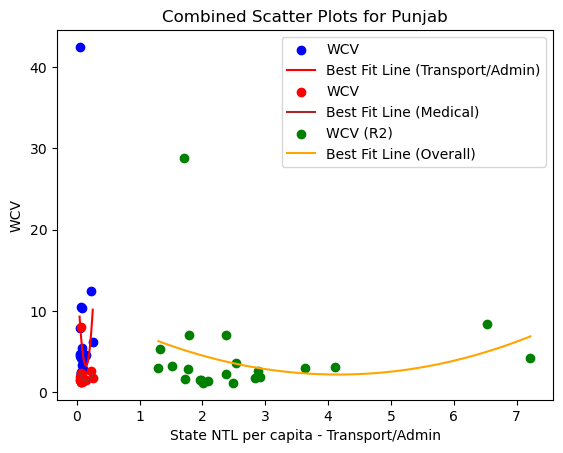

In [40]:
pb = wcvs[wcvs["State"]=="PUNJABB"]
pb['dist_ntl_pc_adm'] = pb['dist_ntl_pc_adm'] *100
pb['dist_ntl_pc_med'] = pb['dist_ntl_pc_med'] *(-100)
pb['WCV_med'] = pb['WCV_med'] *(-1)
pb['dist_ntl_pc'] = pb['dist_ntl_pc'] *100

# Create a scatterplot for the first set of data
plt.scatter(pb['dist_ntl_pc_adm'], pb['WCV_adm'], label='WCV', color='blue', marker='o')

# Fit a polynomial best fit line for the first set of data
coefficients = np.polyfit(pb['dist_ntl_pc_adm'], pb['WCV_adm'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(pb['dist_ntl_pc_adm']), max(pb['dist_ntl_pc_adm']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the first set of data
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Transport/Admin)')

# Create a scatterplot for the first set of data
plt.scatter(pb['dist_ntl_pc_med'], pb['WCV_med'], label='WCV', color='red', marker='o')

# Fit a polynomial best fit line for the first set of data
coefficients = np.polyfit(pb['dist_ntl_pc_med'], pb['WCV_med'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(pb['dist_ntl_pc_med']), max(pb['dist_ntl_pc_med']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the first set of data
plt.plot(x_range, y_fit, color='brown', label='Best Fit Line (Medical)')

# Create a scatterplot for the second set of data
plt.scatter(pb['dist_ntl_pc'], pb['WCV'], label='WCV (R2)', color='green', marker='o')

# Fit a polynomial best fit line for the second set of data
coefficients = np.polyfit(pb['dist_ntl_pc'], pb['WCV'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(pb['dist_ntl_pc']), max(pb['dist_ntl_pc']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the second set of data
plt.plot(x_range, y_fit, color='orange', label='Best Fit Line (Overall)')

# Add labels, title, and legend
plt.xlabel("State NTL per capita - Transport/Admin")
plt.ylabel("WCV")
plt.title("Combined Scatter Plots for Punjab")
plt.legend()

# Display the plot
plt.show()


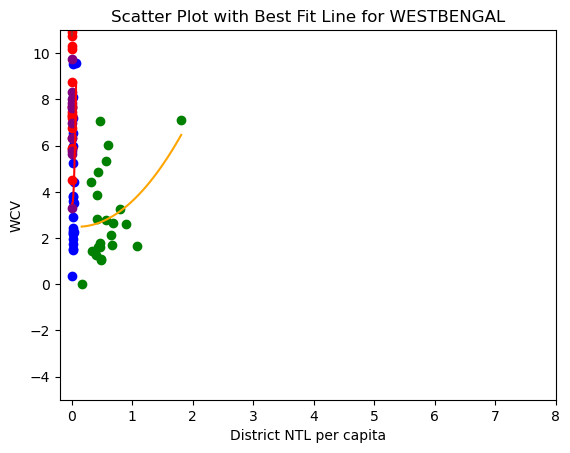

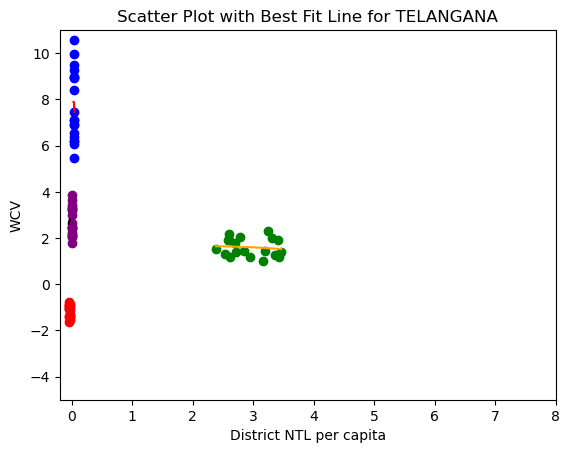

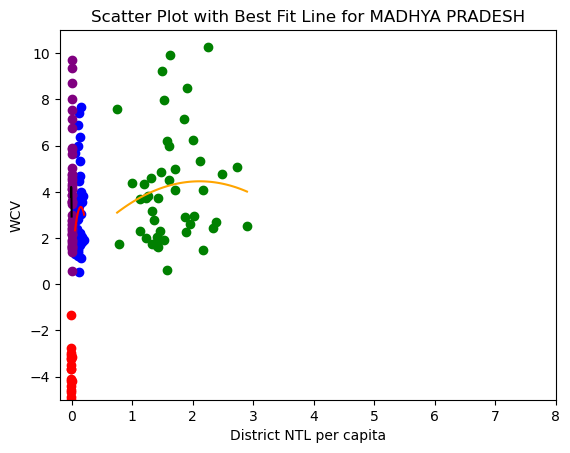

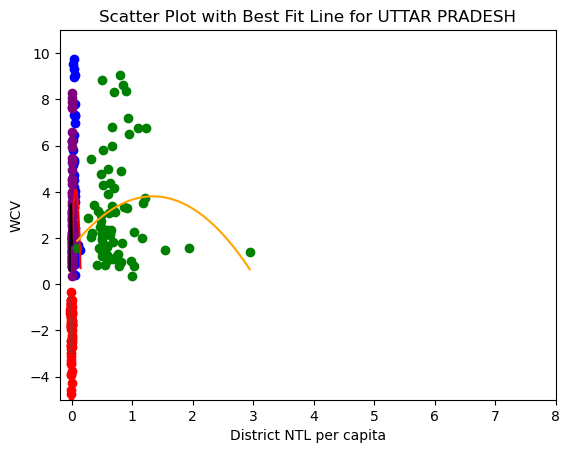

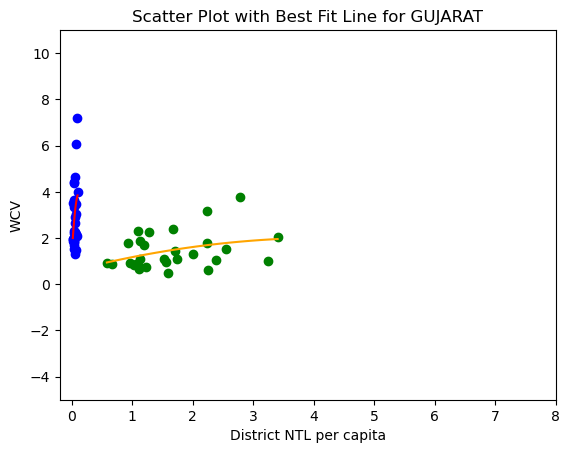

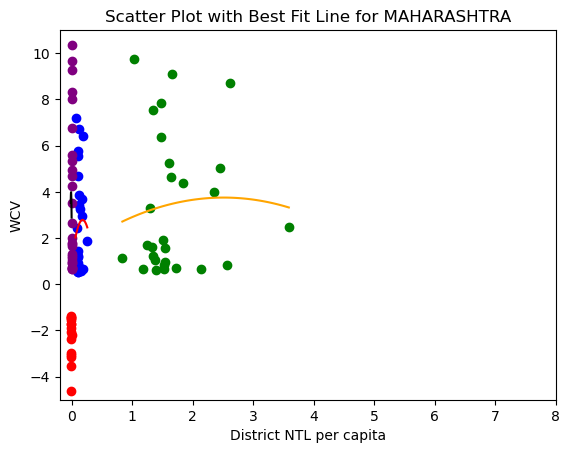

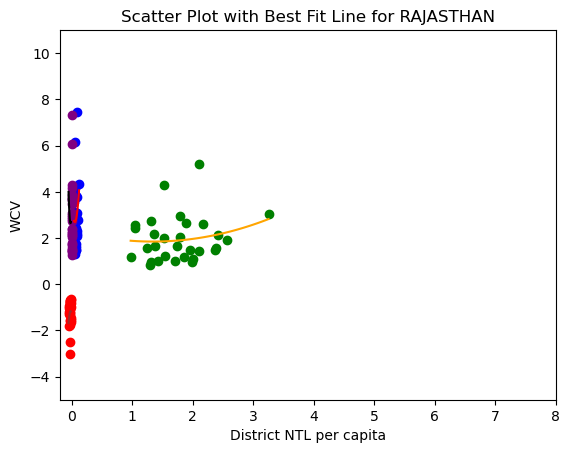

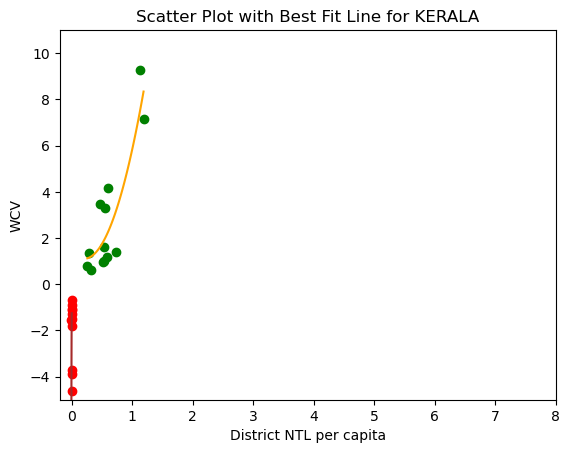

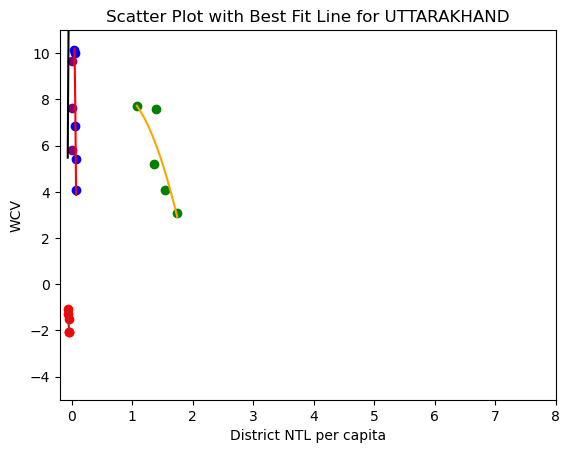

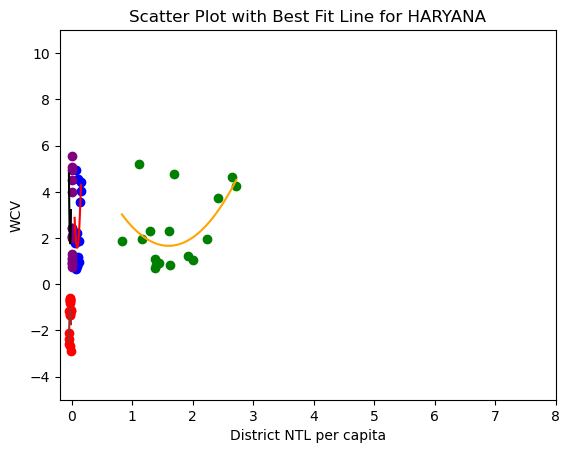

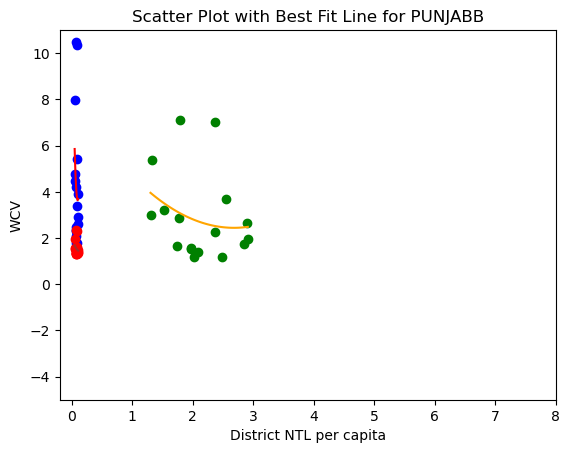

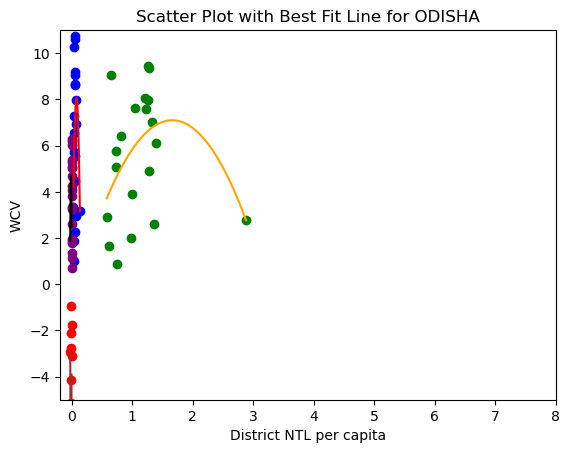

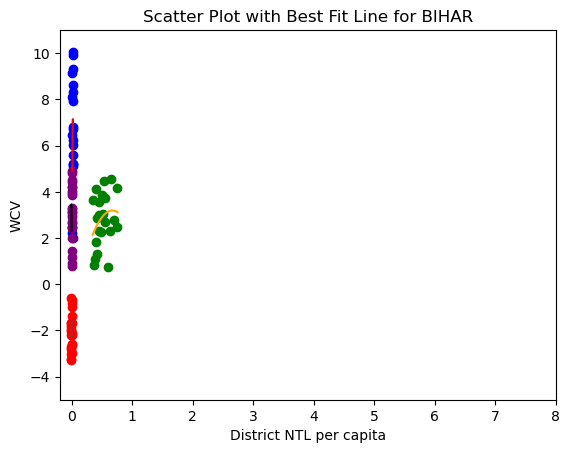

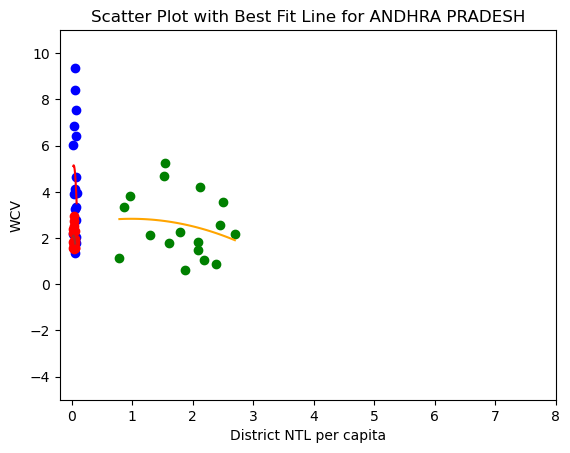

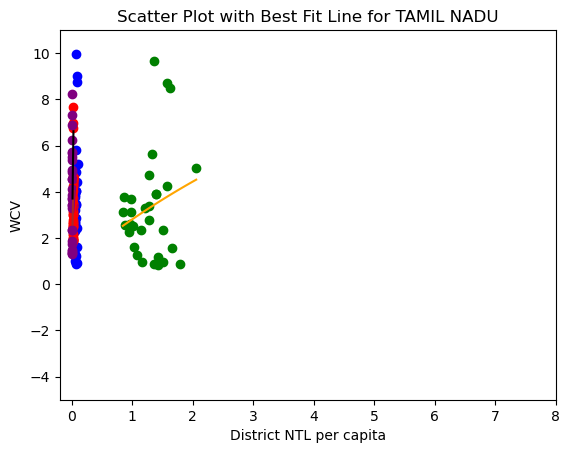

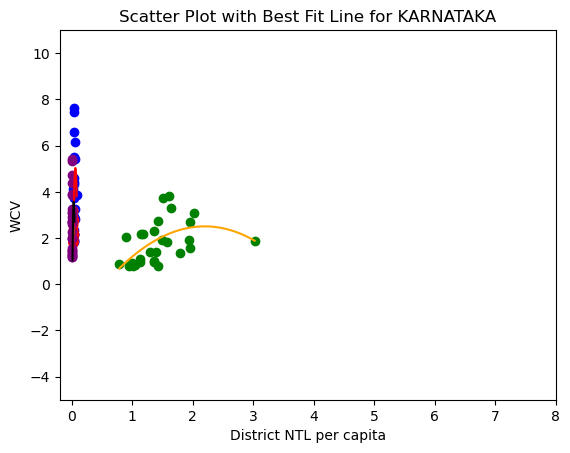

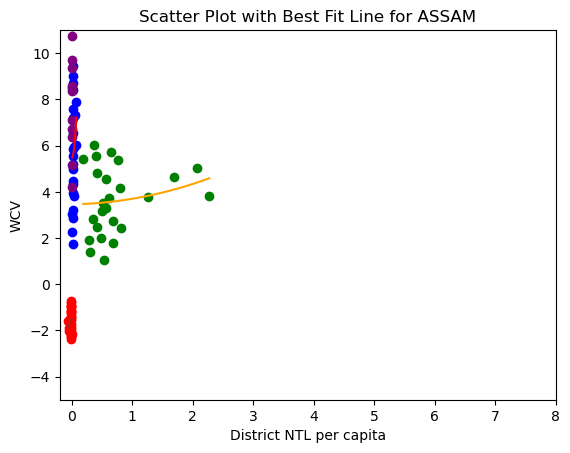

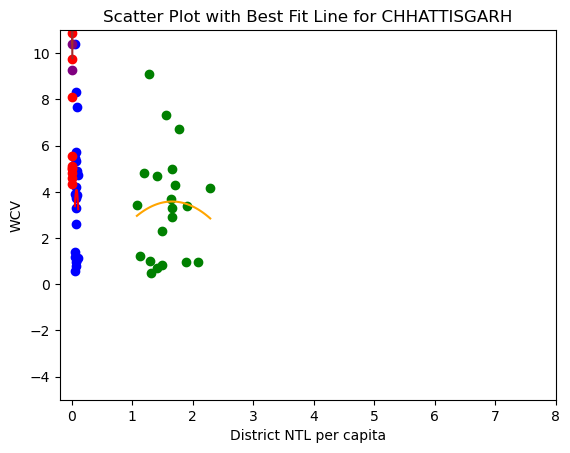

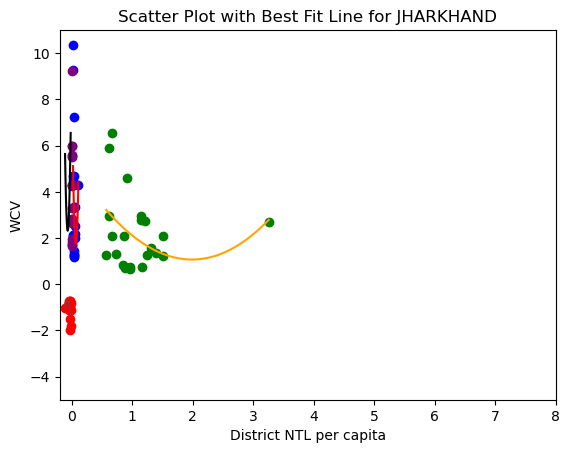

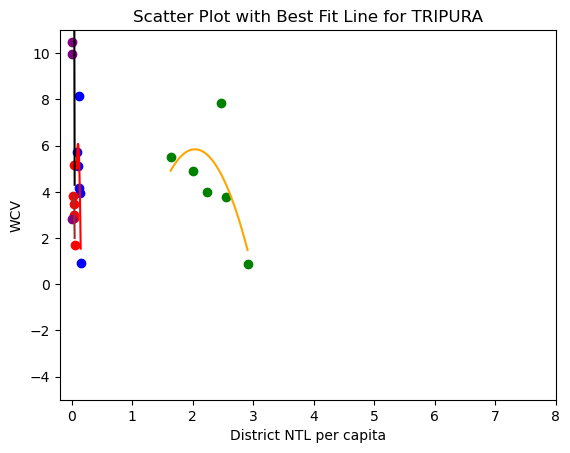

TypeError: expected non-empty vector for x

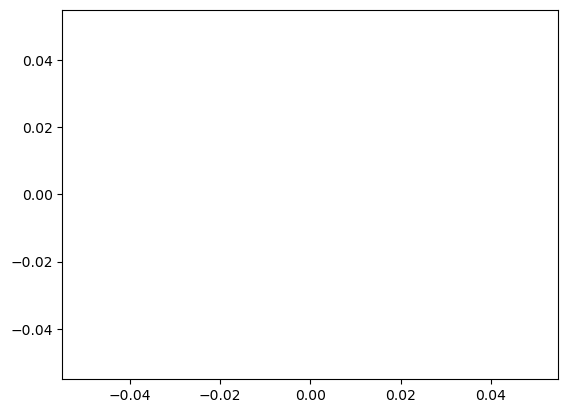

In [59]:
# Get unique state names
unique_states = wcvs['State'].unique()

# Create separate scatter plots with best fit line for each state
for state in unique_states:
    pb = wcvs[wcvs['State'] == state]
    pb = pb[pb['dist_ntl_pc'] <= 0.0362]
    pb = pb[pb['WCV'] <= 10.8291] 
    pb = pb[pb['WCV_adm'] <= 10.8291] 
    # pb = pb[pb['WCV_med'] <= 10.8291] 
    # pb = pb[pb['WCV_edu'] <= 10.8291]
    # pb = pb[pb['WCV_adm'] > -4.0793] 
    # pb = pb[pb['WCV_med'] > -4.0793] 
    # pb = pb[pb['WCV_edu'] > -4.0793]  
    pb['dist_ntl_pc_adm'] = pb['dist_ntl_pc_adm'] *100
    pb['dist_ntl_pc_med'] = pb['dist_ntl_pc_med'] *(-100)
    pb['WCV_med'] = pb['WCV_med'] *(-1)
    pb['dist_ntl_pc'] = pb['dist_ntl_pc'] *100


    # Create a scatterplot for the first set of data
    plt.scatter(pb['dist_ntl_pc_adm'], pb['WCV_adm'], label='WCV', color='blue', marker='o')
    # Fit a polynomial best fit line for the first set of data
    coefficients = np.polyfit(pb['dist_ntl_pc_adm'], pb['WCV_adm'], 2)
    polynomial = np.poly1d(coefficients)
    x_range = np.linspace(min(pb['dist_ntl_pc_adm']), max(pb['dist_ntl_pc_adm']), 100)
    y_fit = polynomial(x_range)
    # Plot the polynomial best fit line for the first set of data
    plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Transport/Admin)')

    # Create a scatterplot for the first set of data
    plt.scatter(pb['dist_ntl_pc_med'], pb['WCV_med'], label='WCV', color='red', marker='o')
    # Fit a polynomial best fit line for the first set of data
    coefficients = np.polyfit(pb['dist_ntl_pc_med'], pb['WCV_med'], 2)
    polynomial = np.poly1d(coefficients)
    x_range = np.linspace(min(pb['dist_ntl_pc_med']), max(pb['dist_ntl_pc_med']), 100)
    y_fit = polynomial(x_range)
    # Plot the polynomial best fit line for the first set of data
    plt.plot(x_range, y_fit, color='brown', label='Best Fit Line (Medical)')

    # Create a scatterplot for the first set of data
    plt.scatter(pb['dist_ntl_pc_edu'], pb['WCV_edu'], label='WCV', color='purple', marker='o')
    # Fit a polynomial best fit line for the first set of data
    coefficients = np.polyfit(pb['dist_ntl_pc_med'], pb['WCV_edu'], 2)
    polynomial = np.poly1d(coefficients)
    x_range = np.linspace(min(pb['dist_ntl_pc_med']), max(pb['dist_ntl_pc_med']), 100)
    y_fit = polynomial(x_range)
    # Plot the polynomial best fit line for the first set of data
    plt.plot(x_range, y_fit, color='black', label='Best Fit Line (Edu)')

    # Create a scatterplot for the second set of data
    plt.scatter(pb['dist_ntl_pc'], pb['WCV'], label='WCV (R2)', color='green', marker='o')
    # Fit a polynomial best fit line for the second set of data
    coefficients = np.polyfit(pb['dist_ntl_pc'], pb['WCV'], 2)
    polynomial = np.poly1d(coefficients)
    x_range = np.linspace(min(pb['dist_ntl_pc']), max(pb['dist_ntl_pc']), 100)
    y_fit = polynomial(x_range)
    # Plot the polynomial best fit line for the second set of data
    plt.plot(x_range, y_fit, color='orange', label='Best Fit Line (Overall)')

    # Set x and y-axis limits
    plt.xlim(-0.2, 8)
    plt.ylim(-5, 11)

    # Add labels, title, legend, and show plot
    plt.xlabel("District NTL per capita")
    plt.ylabel("WCV")
    plt.title(f"Scatter Plot with Best Fit Line for {state}")
    # plt.legend()
    plt.show()



/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_10823/3774887728.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pb['dist_ntl_pc_adm'] = pb['dist_ntl_pc_adm'] *100
/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_10823/3774887728.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pb['dist_ntl_pc_med'] = pb['dist_ntl_pc_med'] *(100)
/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_10823/3774887728.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

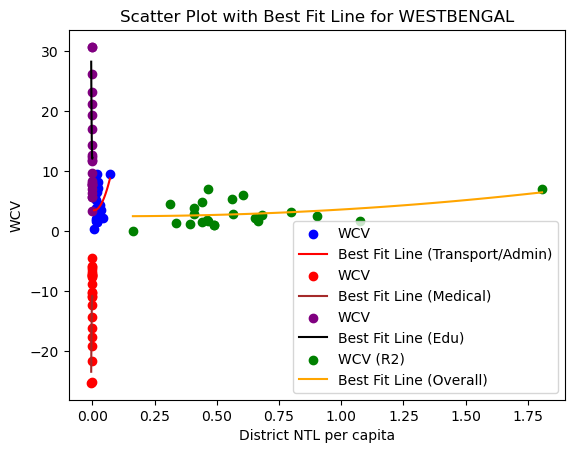

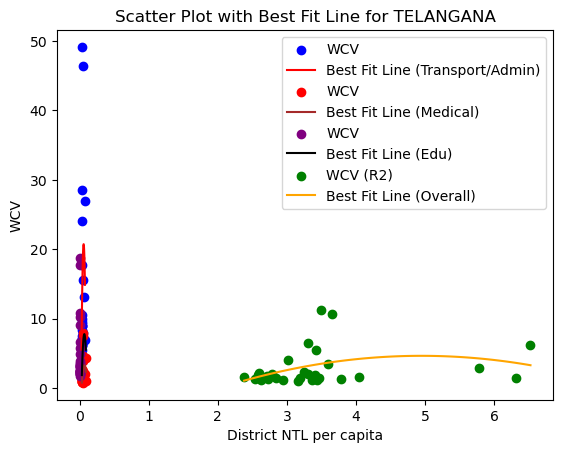

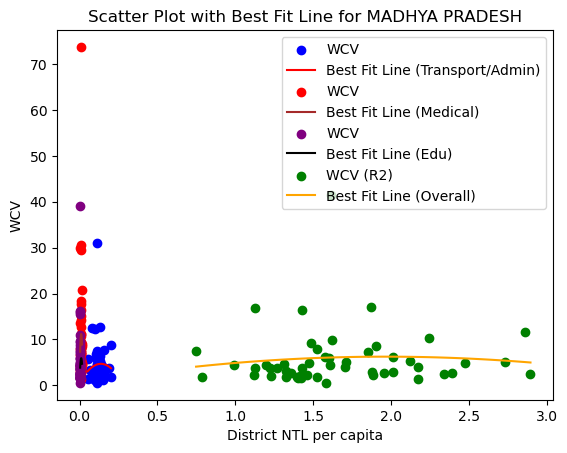

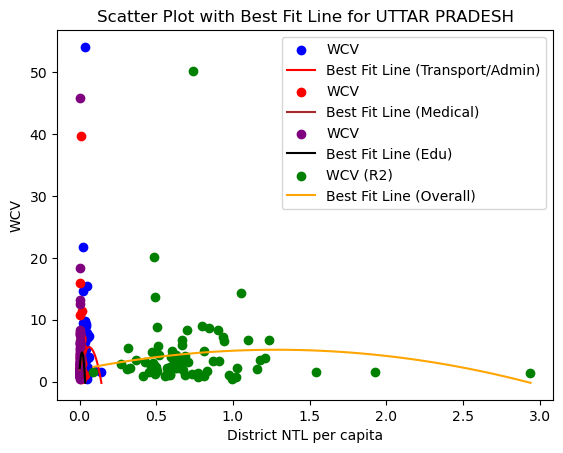

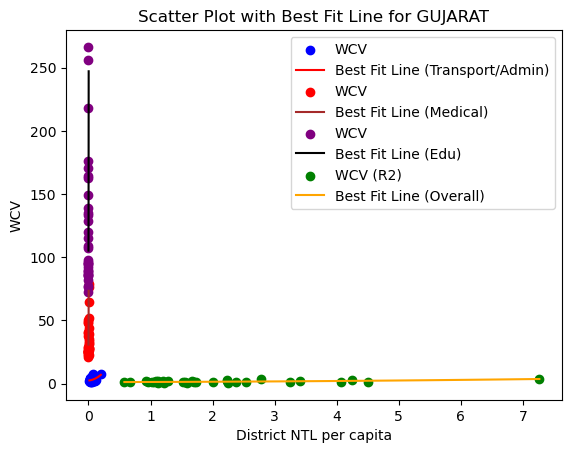

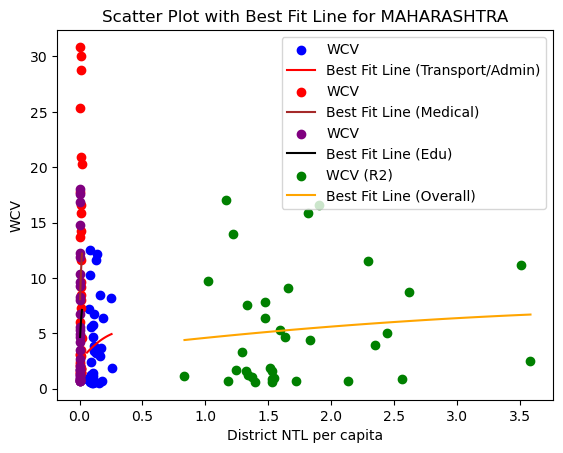

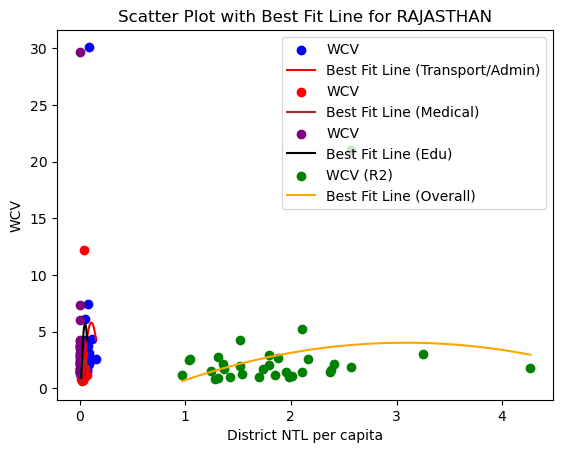

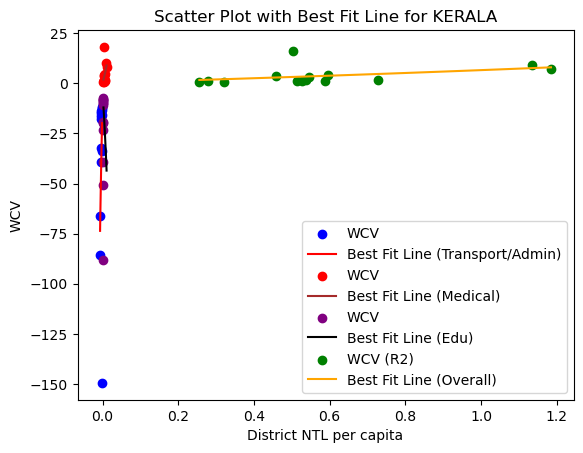

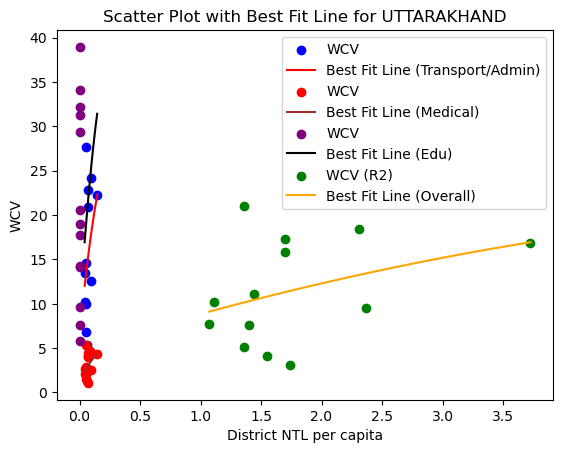

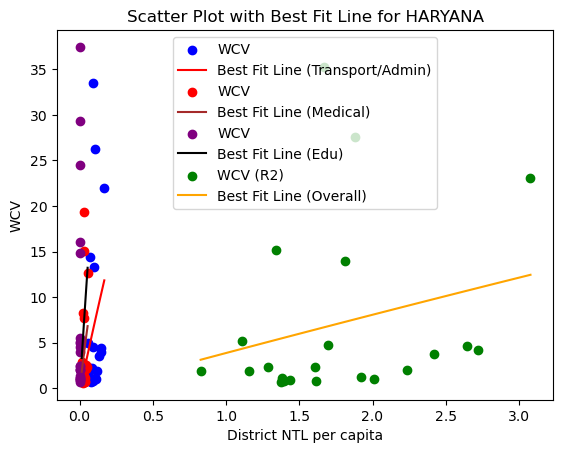

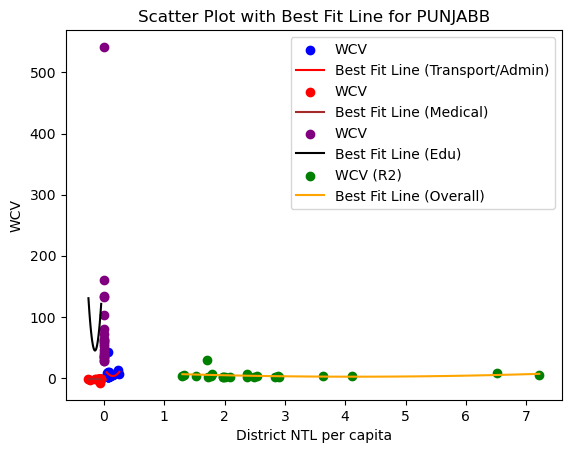

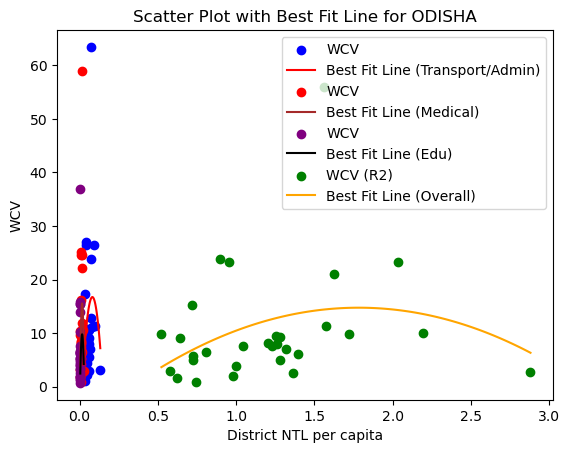

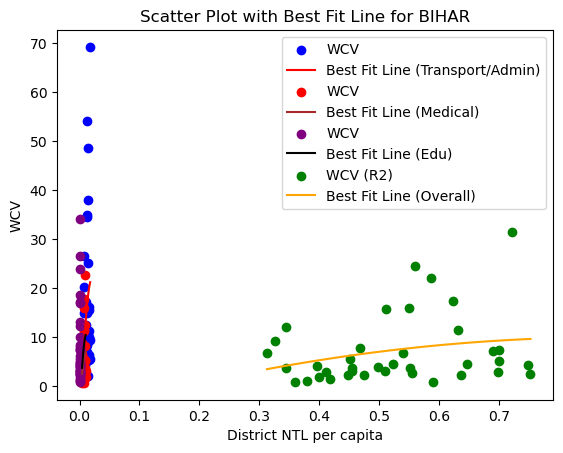

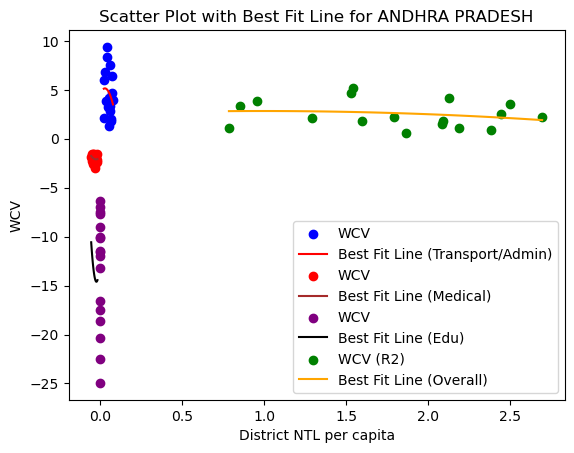

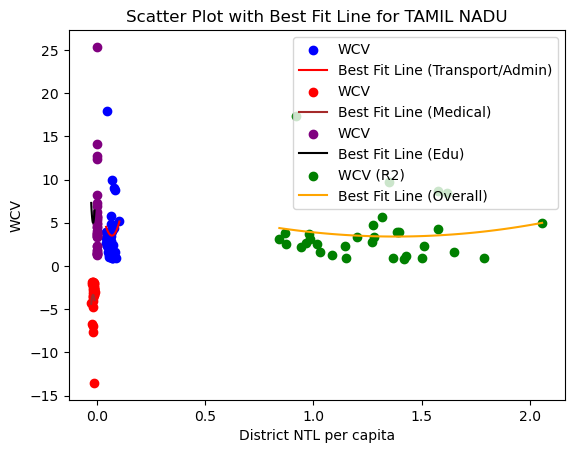

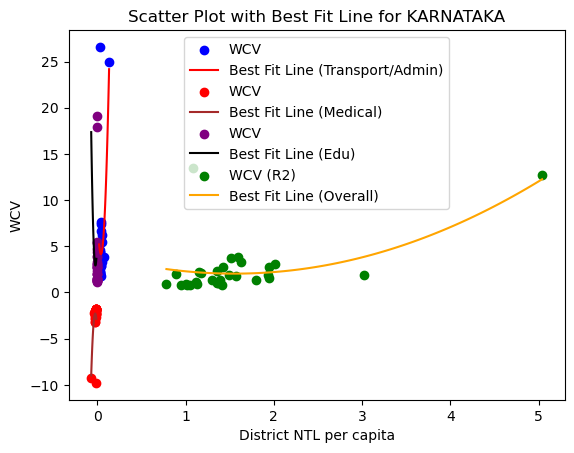

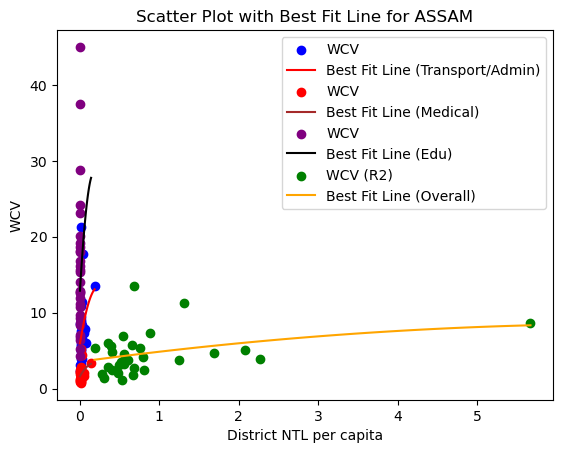

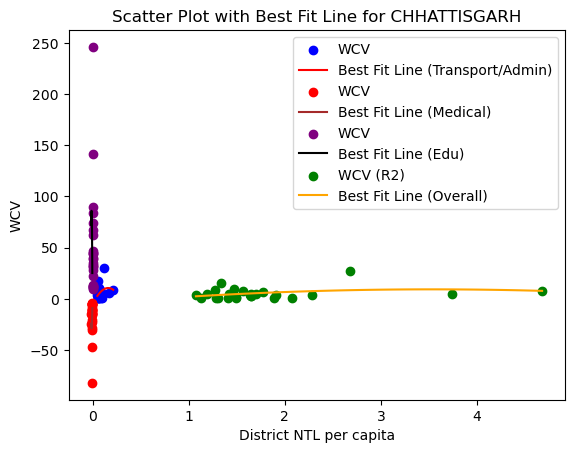

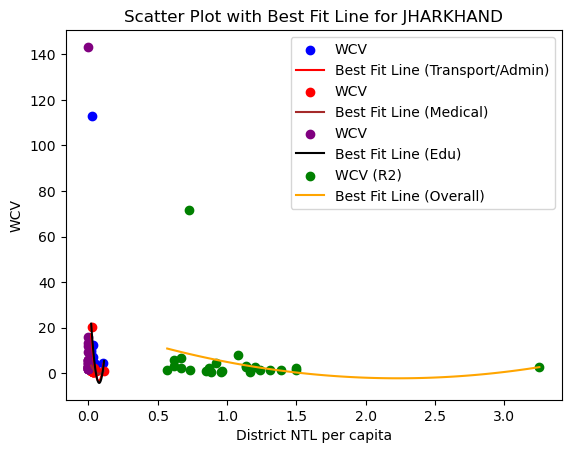

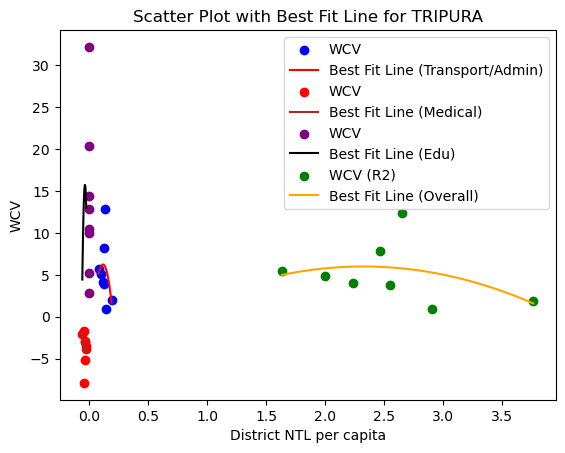

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


/Users/sid/anaconda3/lib/python3.11/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

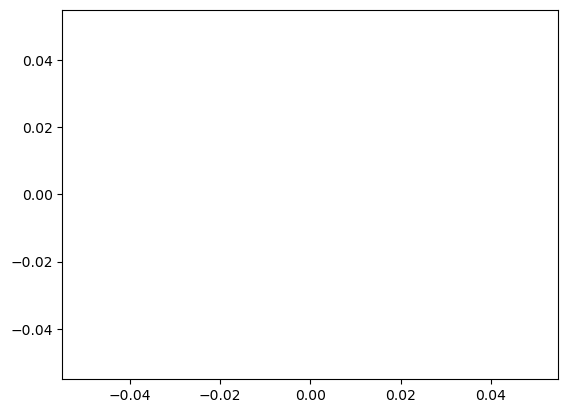

In [60]:
# Get unique state names
unique_states = wcvs['State'].unique()

# Create separate scatter plots with best fit line for each state
for state in unique_states:
    pb = wcvs[wcvs['State'] == state]
    pb['dist_ntl_pc_adm'] = pb['dist_ntl_pc_adm'] *100
    pb['dist_ntl_pc_med'] = pb['dist_ntl_pc_med'] *(100)
    # pb['WCV_med'] = pb['WCV_med'] *(1)
    pb['dist_ntl_pc'] = pb['dist_ntl_pc'] *100

    # Create a scatterplot for the first set of data
    plt.scatter(pb['dist_ntl_pc_adm'], pb['WCV_adm'], label='WCV', color='blue', marker='o')
    # Fit a polynomial best fit line for the first set of data
    coefficients = np.polyfit(pb['dist_ntl_pc_adm'], pb['WCV_adm'], 2)
    polynomial = np.poly1d(coefficients)
    x_range = np.linspace(min(pb['dist_ntl_pc_adm']), max(pb['dist_ntl_pc_adm']), 100)
    y_fit = polynomial(x_range)
    # Plot the polynomial best fit line for the first set of data
    plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Transport/Admin)')

    # Create a scatterplot for the first set of data
    plt.scatter(pb['dist_ntl_pc_med'], pb['WCV_med'], label='WCV', color='red', marker='o')
    # Fit a polynomial best fit line for the first set of data
    coefficients = np.polyfit(pb['dist_ntl_pc_med'], pb['WCV_med'], 2)
    polynomial = np.poly1d(coefficients)
    x_range = np.linspace(min(pb['dist_ntl_pc_med']), max(pb['dist_ntl_pc_med']), 100)
    y_fit = polynomial(x_range)
    # Plot the polynomial best fit line for the first set of data
    plt.plot(x_range, y_fit, color='brown', label='Best Fit Line (Medical)')
    
    # Create a scatterplot for the first set of data
    plt.scatter(pb['dist_ntl_pc_edu'], pb['WCV_edu'], label='WCV', color='purple', marker='o')
    # Fit a polynomial best fit line for the first set of data
    coefficients = np.polyfit(pb['dist_ntl_pc_med'], pb['WCV_edu'], 2)
    polynomial = np.poly1d(coefficients)
    x_range = np.linspace(min(pb['dist_ntl_pc_med']), max(pb['dist_ntl_pc_med']), 100)
    y_fit = polynomial(x_range)
    # Plot the polynomial best fit line for the first set of data
    plt.plot(x_range, y_fit, color='black', label='Best Fit Line (Edu)')

    # Create a scatterplot for the second set of data
    plt.scatter(pb['dist_ntl_pc'], pb['WCV'], label='WCV (R2)', color='green', marker='o')
    # Fit a polynomial best fit line for the second set of data
    coefficients = np.polyfit(pb['dist_ntl_pc'], pb['WCV'], 2)
    polynomial = np.poly1d(coefficients)
    x_range = np.linspace(min(pb['dist_ntl_pc']), max(pb['dist_ntl_pc']), 100)
    y_fit = polynomial(x_range)
    # Plot the polynomial best fit line for the second set of data
    plt.plot(x_range, y_fit, color='orange', label='Best Fit Line (Overall)')

    # Set x and y-axis limits
    # plt.xlim(0, 8)
    # plt.ylim(0, 3)

    # Add labels, title, legend, and show plot
    plt.xlabel("District NTL per capita")
    plt.ylabel("WCV")
    plt.title(f"Scatter Plot with Best Fit Line for {state}")
    plt.legend()
    plt.show()

